# TOPIC PRESENTATION: CHANGE-POINT DETECTION

Lily Huang, Shree Chatterjee

There are  very few Python libraries that deal with change-point detection. We began our search by looking through existing, familiar libraries that offer time series support including `statsmodels.tsa`, `scikits.timeseries`, and `scipy.signal`. Unfortunately, none of them yielded any change-point detection algorithms.

As such, for our demonstration, we will be using the Python library `ruptures`, which does provide offline change point detection. The package helps find and analyze non-stationary signals and handles various parametric and non-parametric models.

Methods to detect change points in multivariate time series include retrospective (offline) procedure such as maximum likelihood estimation, regression, and kernel methods.

To our knowledge, `ruptures` is the most popular library (and highest rated in GitHub) for change-point detection.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
from ruptures.metrics import hausdorff, randindex, precision_recall

from IPython.display import Image
from IPython.core.display import HTML 

# Synthesize signals

One of the features of the `ruptures` library is that it allows an easy way to generate your own synthetic time series and signals data. In this section, we will explore possible types of manipulations.

In [2]:
# set data parameters
n = 300
dim = 1
sigma = 0.2
n_bkps = 4
jump_range = (1, 3)

## Mean shift

For a given number of samples $T$, number of changepoints $K$ and noise variance $\sigma^2$, this function generates change point indexes $0<t_1<\dots<t_K<T$ and a piecewise constant signal $\{y_t\}_t$ with additive Gaussian noise.

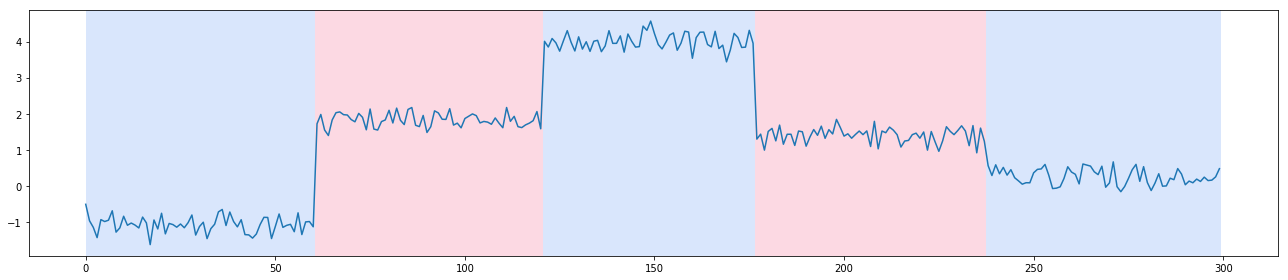

In [3]:
signal1, bkps1 = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma, delta=jump_range)
rpt.display(signal1, bkps1, figsize=(18, 4))
plt.show()

## Frequency/wave shift

This function simulates a sum-of-sine signal $y_t=\sin(2\pi f_1t)+\sin(2\pi f_2t)$ where $t=0,\dots,T−1$. The frequency vector $[f_1,f_2]$ alternates between $[0.075,0.1]$ and $[0.1,0.125]$ at each change point index.

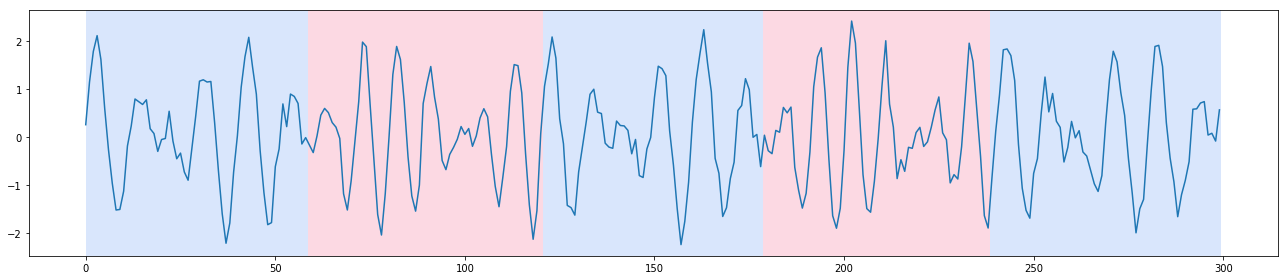

In [4]:
signal2, bkps2 = rpt.pw_wavy(n, n_bkps, noise_std=sigma)
rpt.display(signal2, bkps2, figsize=(18, 4))
plt.show()

## Correlation shift

This function simulates a 2D signal of Gaussian i.i.d. random variables with zero mean and covariance matrix alternating between $[[1,0.9],[0.9,1]]$ and $[[1,−0.9],[−0.9,1]]$ at every change point.

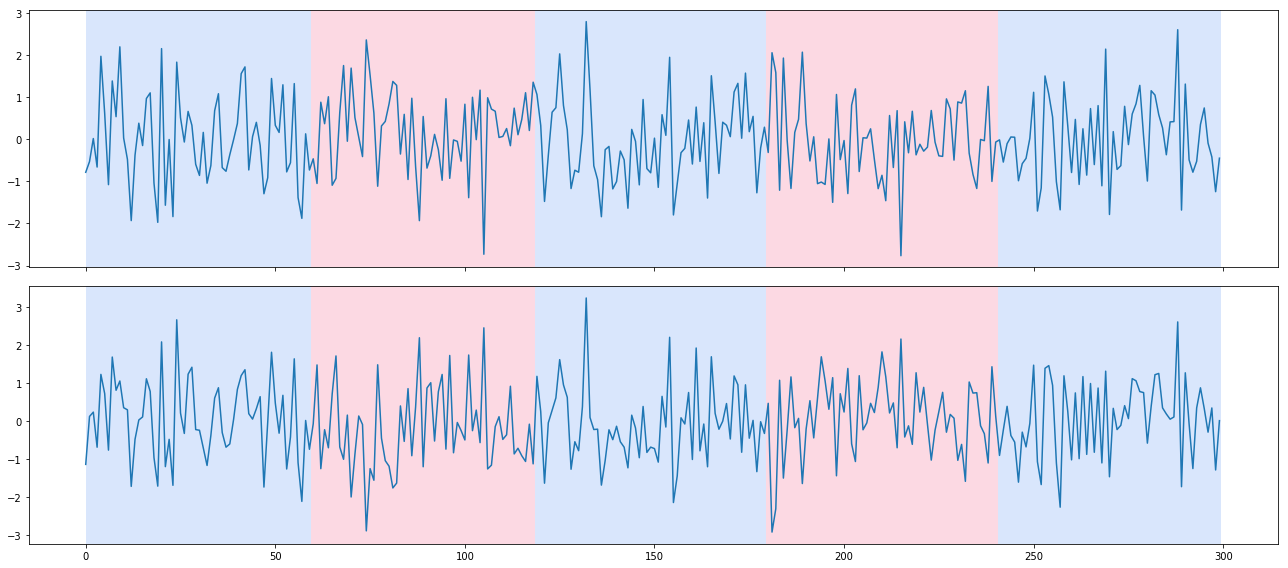

In [5]:
signal3, bkps3 = rpt.pw_normal(n, n_bkps)
rpt.display(signal3, bkps3, figsize=(18, 8))
plt.show()

# Detecting changepoints

There are many different models for detecting changepoints offline. All methods can be described as a collection of three elements: a cost function, a search method, and a constraint on the number of changes to detect. Here, we list some of the options the `ruptures` library offers.

## Search methods and Cost functions

Search methods include:
* Exact segmentation: dynamic programming
* Exact segmentation: Pelt
* Binary segmentation
* Bottom-up segmentation
* Window-based change point detection

Cost functions include:
* Least absolute deviation (good for mean shifts)
* Least squared deviation (good for mean shifts)
* Gaussian process change (good for mean and variance shifts)
* Kernelized mean change
* Linear model change
* Autoregressive model change
* Mahalanobis-type metric

In the section below, we will be using each of these search methods, across each different type of cost function, for all three of our above signal types (mean shift, frequency shift, correlation shift).

### Pelt segmentation

The Pelt algorithm followers the work of Killick et al. (2012). It uses a pruning rule in which many indexes are discarded, greatly reducing the computational cost while retaining the ability to find the optimal segmentation. In addition, under certain conditions on the change point repartition, the computational complexity is linear on average.

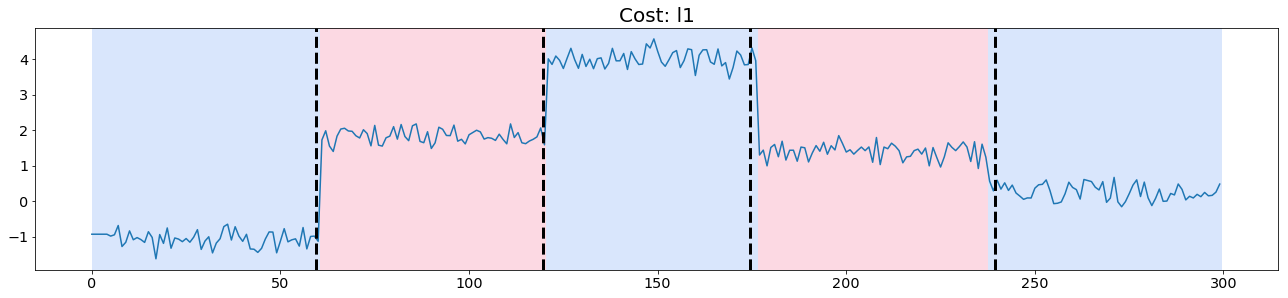

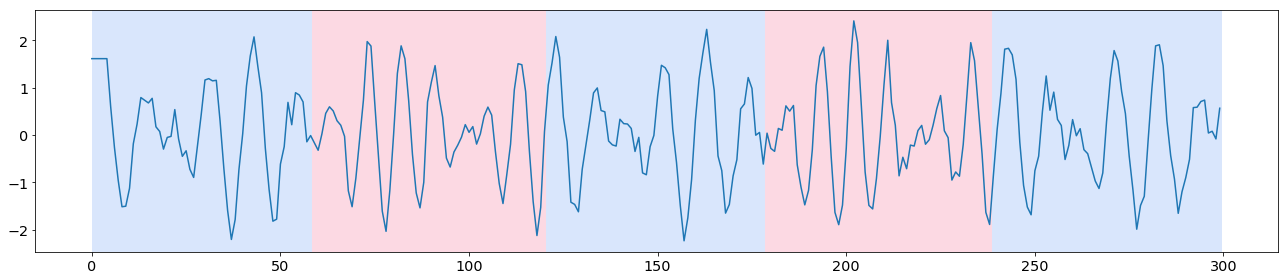

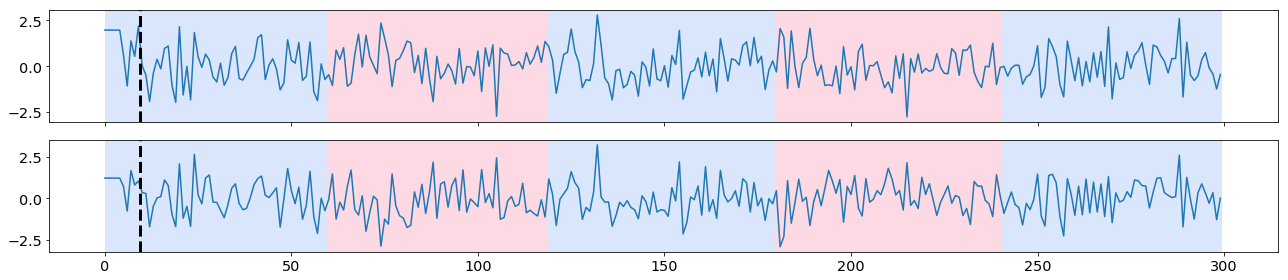

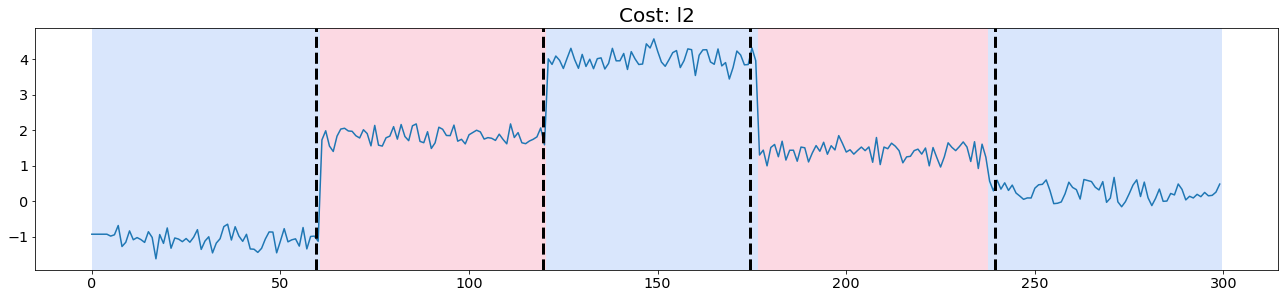

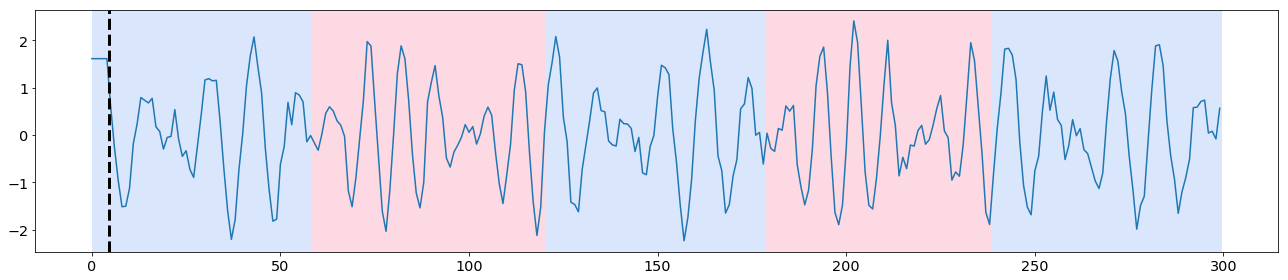

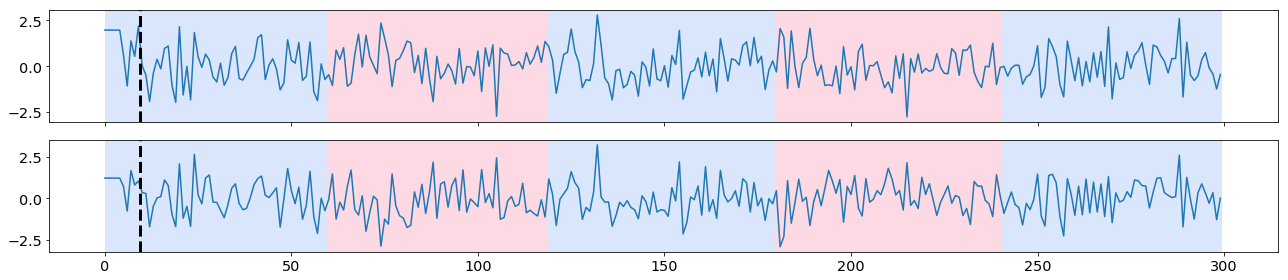

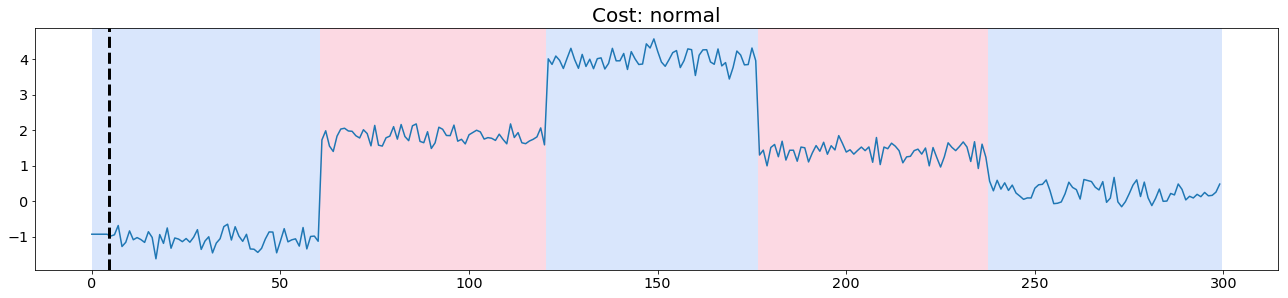

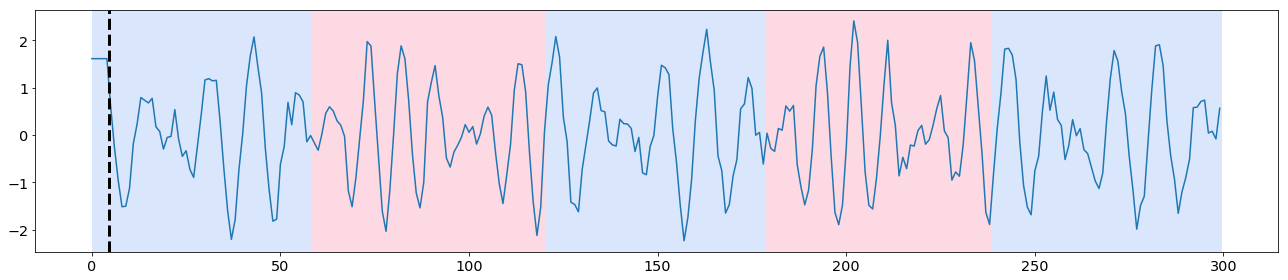

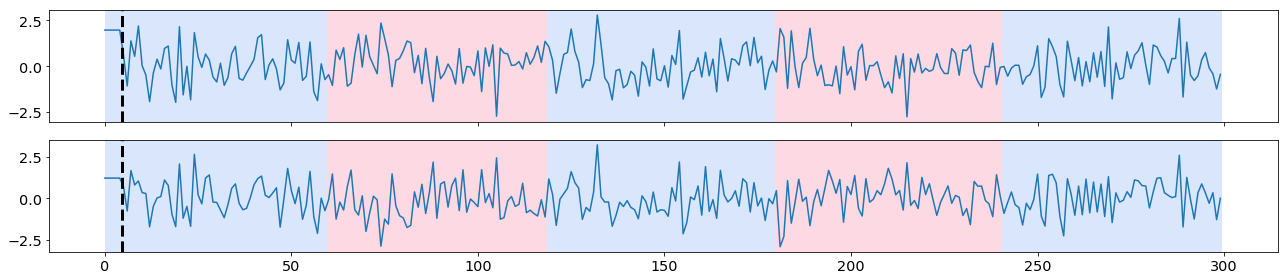

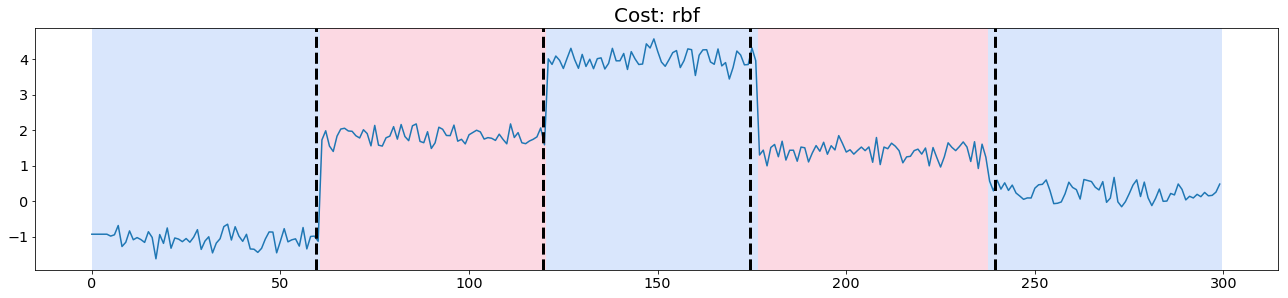

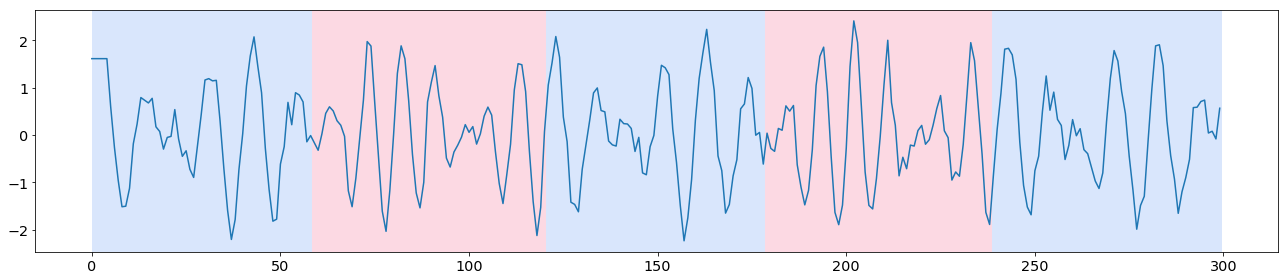

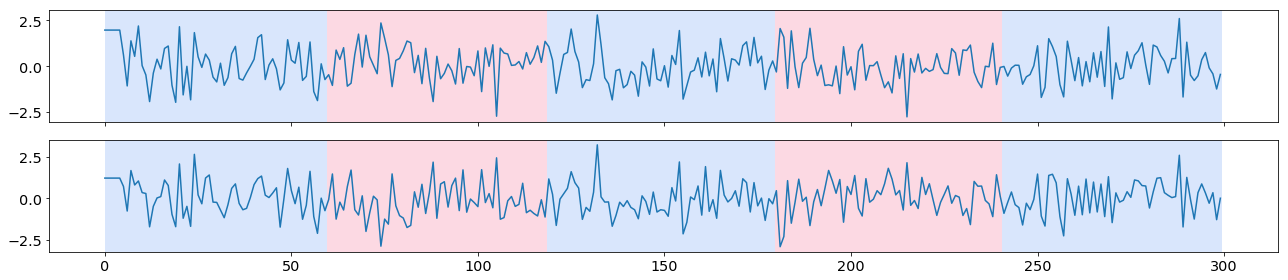

/anaconda3/lib/python3.6/site-packages/ruptures/costs/costautoregressive.py:169: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  _, residual, _, _ = lstsq(X, y)


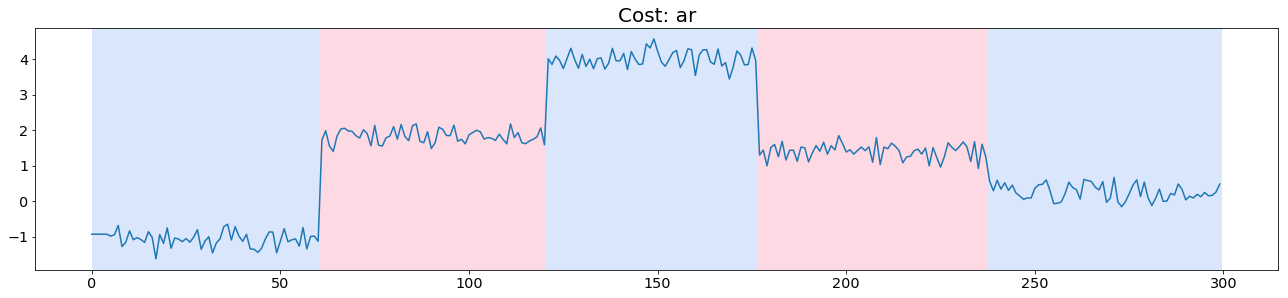

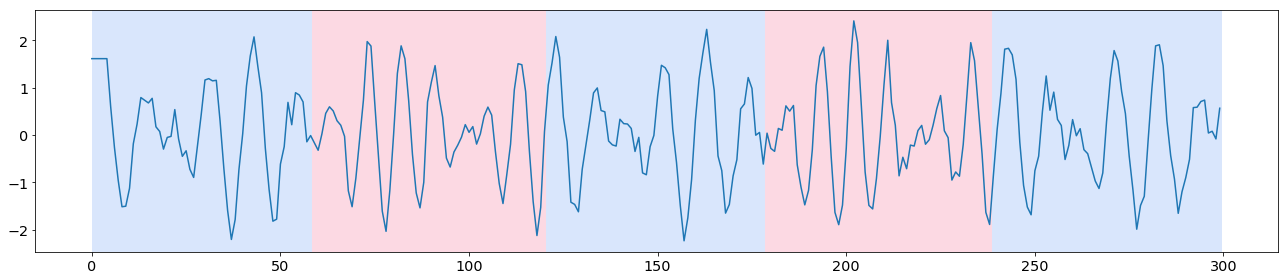

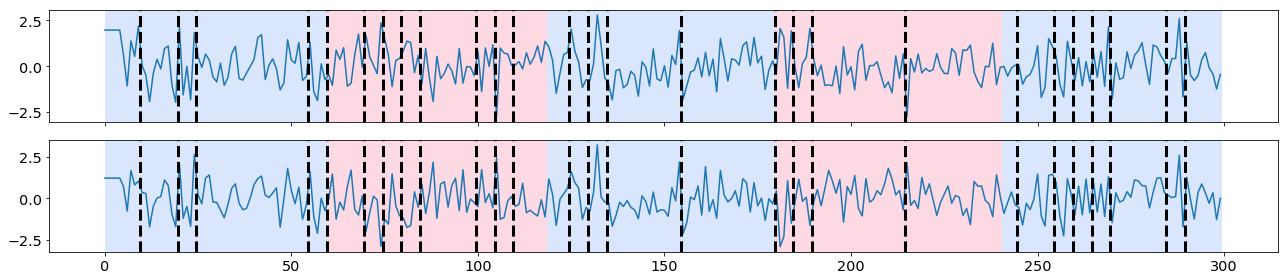

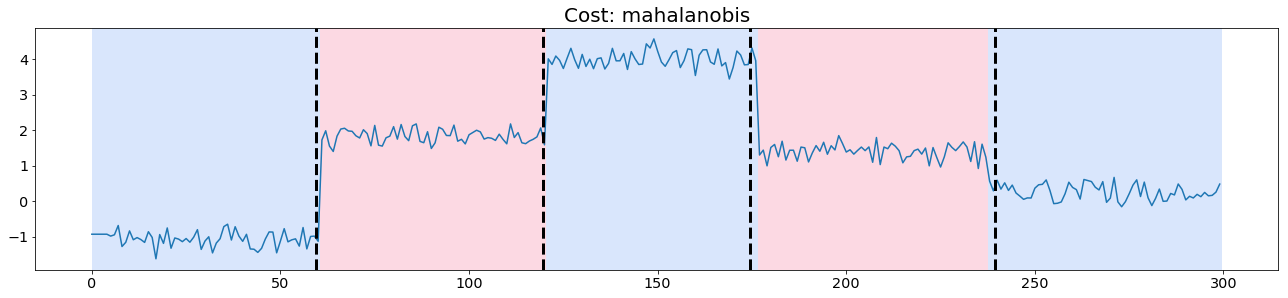

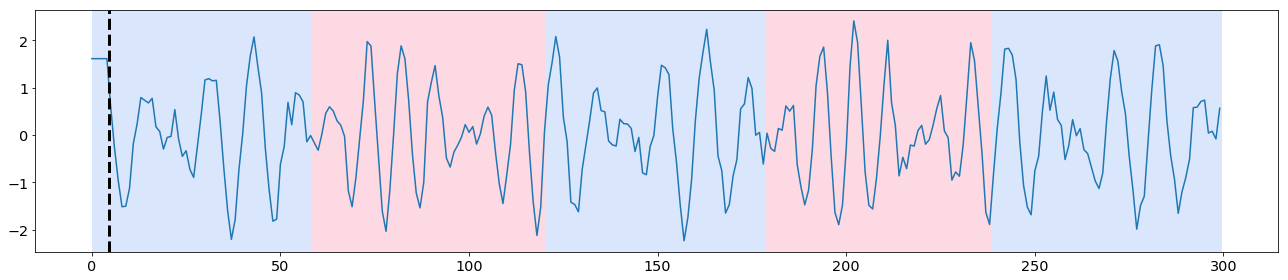

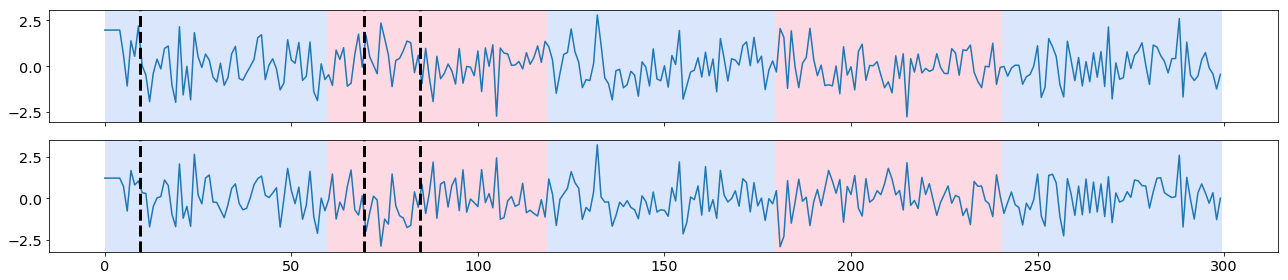

In [36]:
# cost functions = "l1", "l2", "normal", "rbf", "linear", "ar", "mahalanobis"
costs = ["l1", "l2", "normal", "rbf", "ar", "mahalanobis"]

for c in costs:
    # detection
    algo = rpt.Pelt(model=c).fit(signal1)
    result1 = algo.predict(pen=10)
    algo = rpt.Pelt(model=c).fit(signal2)
    result2 = algo.predict(pen=10)
    algo = rpt.Pelt(model=c).fit(signal3)
    result3 = algo.predict(pen=10)

    # display
    rpt.display(signal1, bkps1, result1, figsize=(18, 4))
    plt.title('Cost: ' + c, fontsize=20)
    plt.show()
    rpt.display(signal2, bkps2, result2, figsize=(18, 4))
    plt.show()
    rpt.display(signal3, bkps3, result3, figsize=(18, 4))
    plt.show()

### Dynamic programming segmentation

The dynamic programming method computes the cost of all subsequences of a given signal. The number of computed costs is of the order $O(Kn^2)$, where $K$ is the number of change points and $n$ the number of samples. This has to be multiplied by the computational cost of computing the approximation error on one sub-sequence. Consequently, piecewise constant models are significantly faster than linear or autoregressive models.

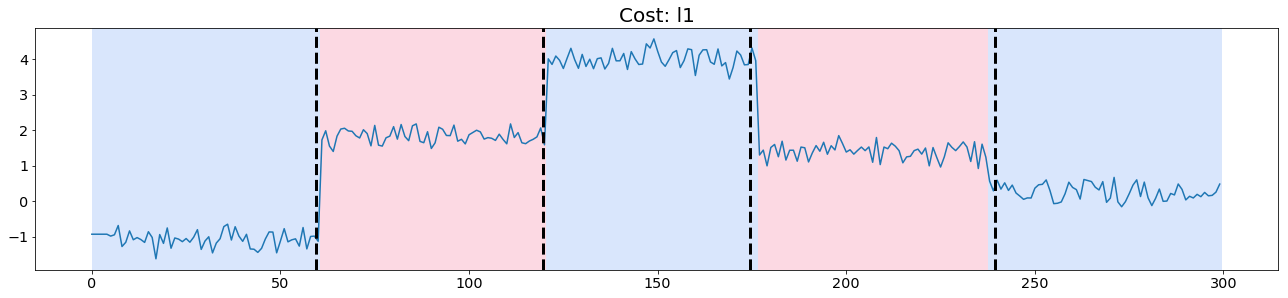

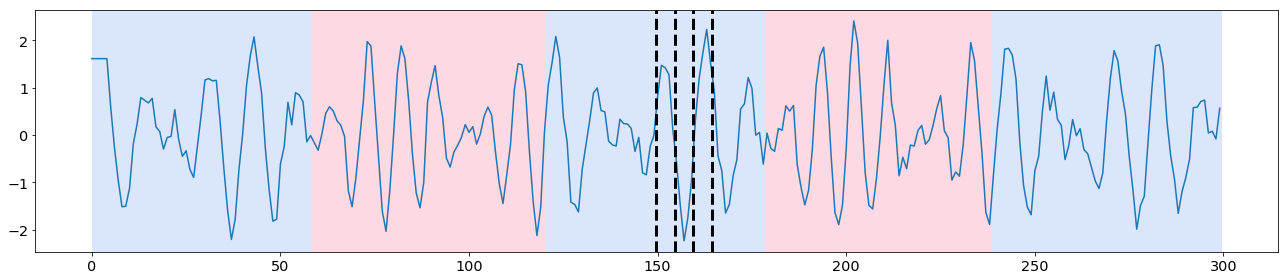

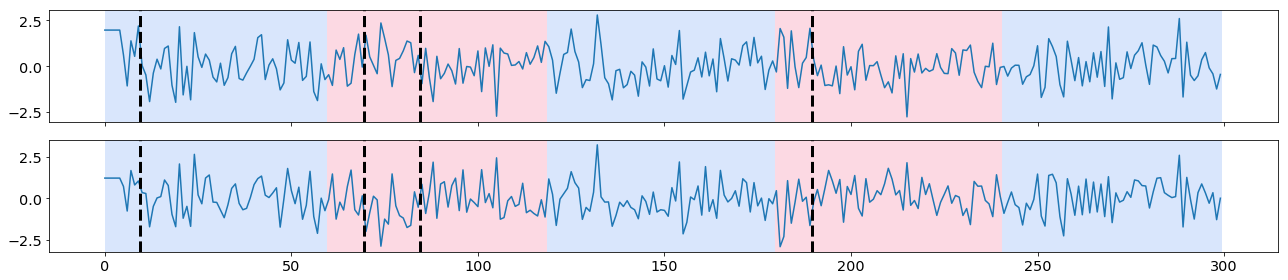

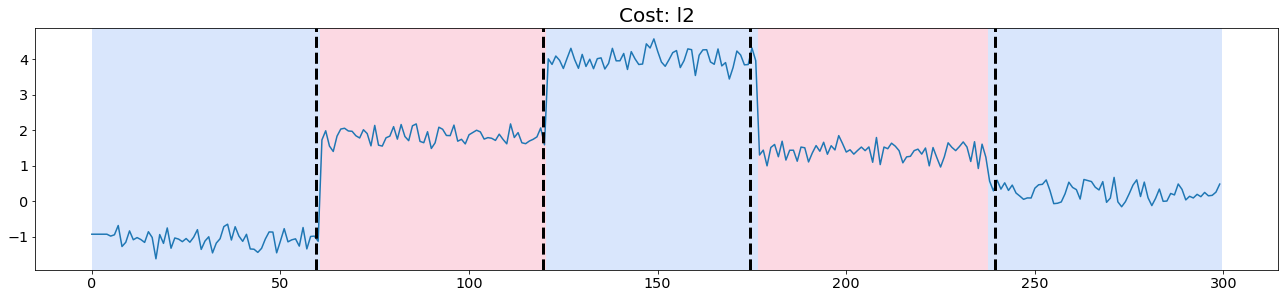

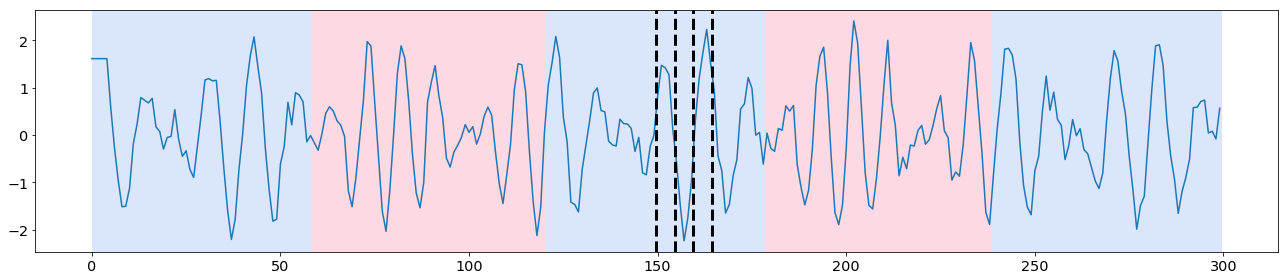

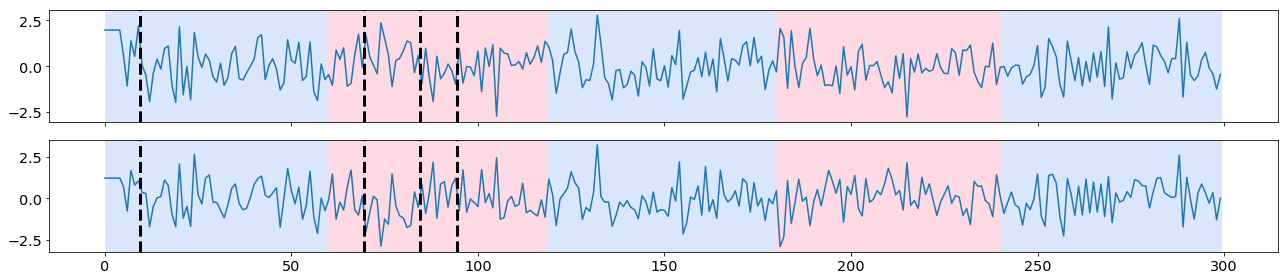

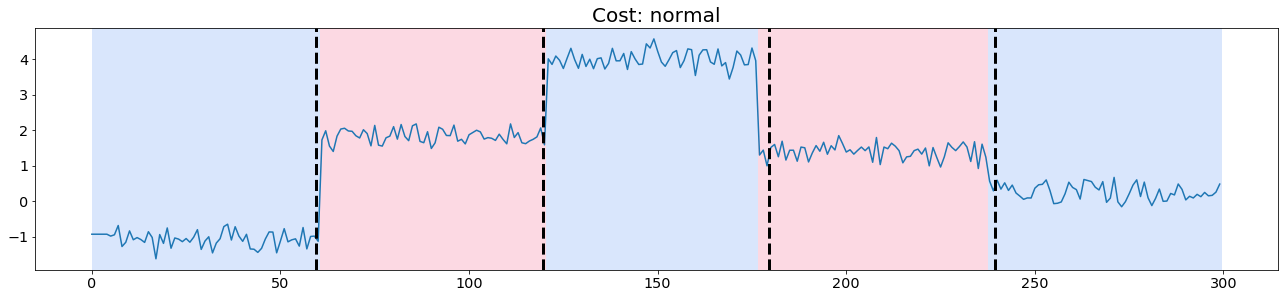

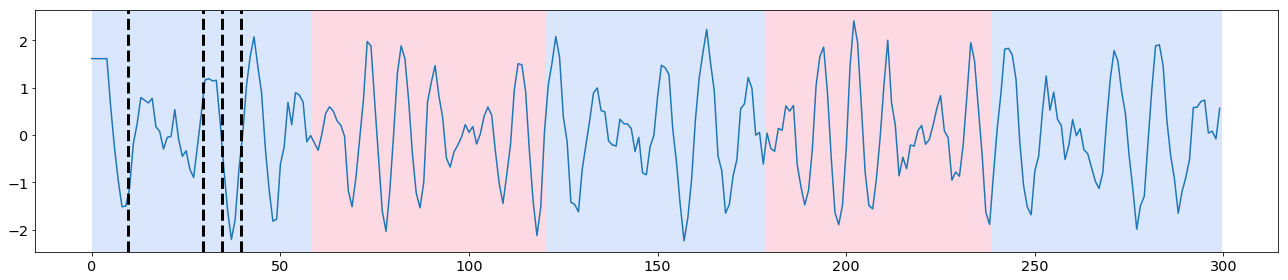

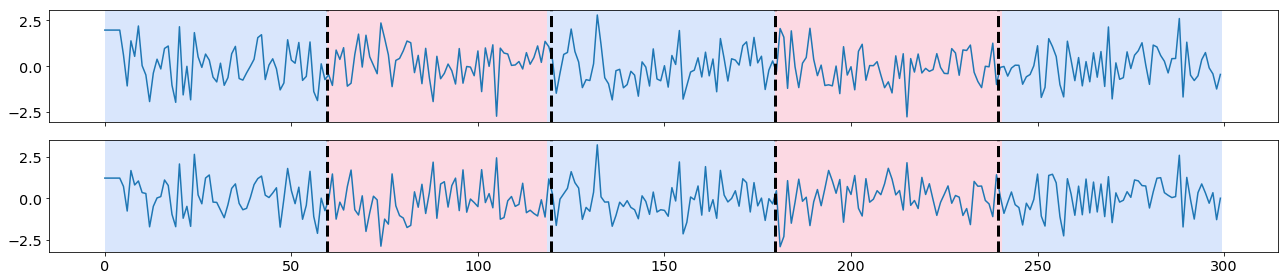

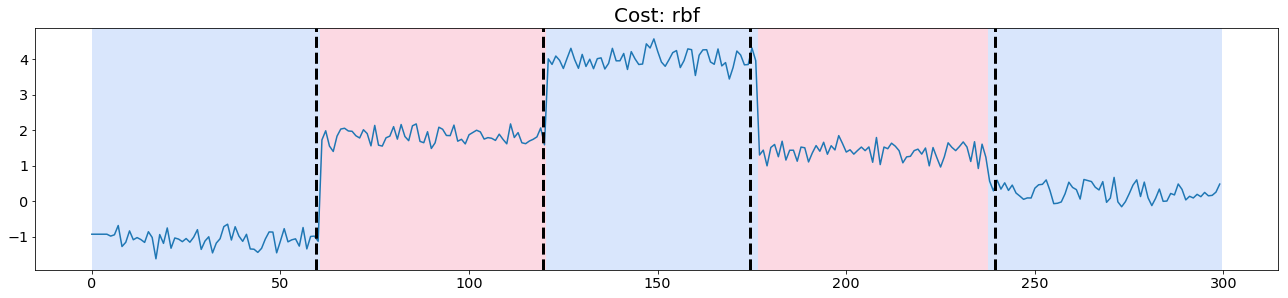

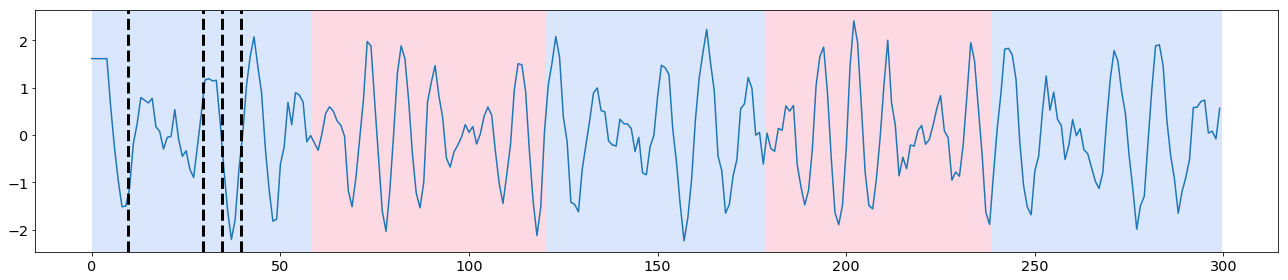

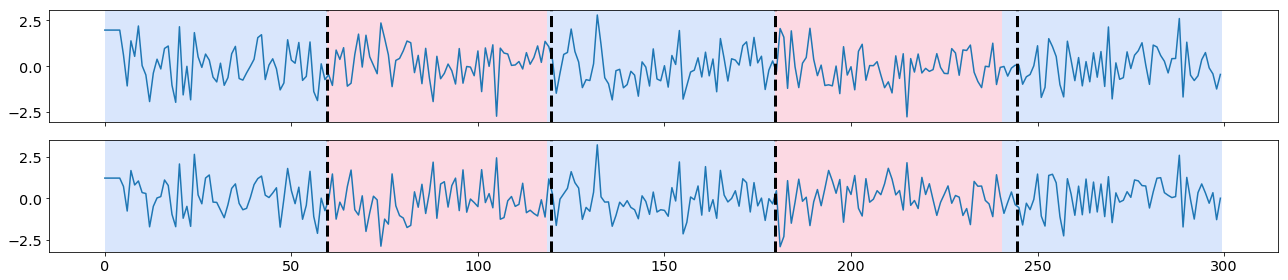

/anaconda3/lib/python3.6/site-packages/ruptures/costs/costautoregressive.py:169: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  _, residual, _, _ = lstsq(X, y)


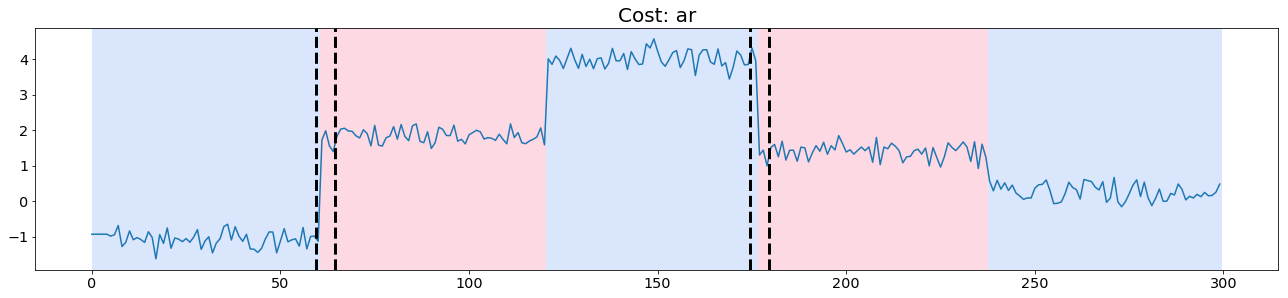

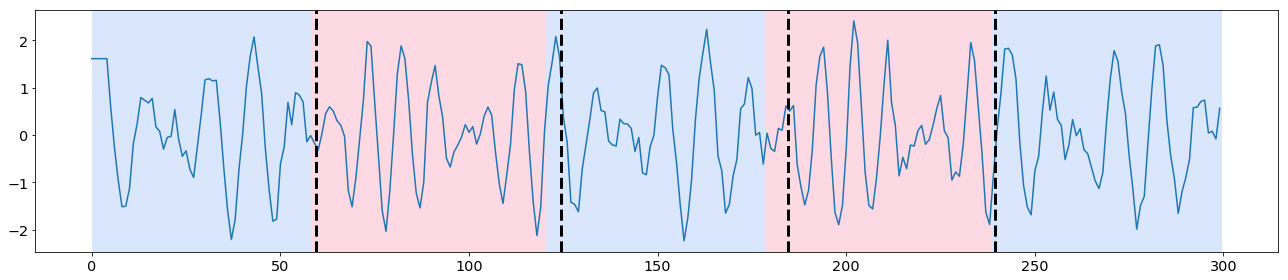

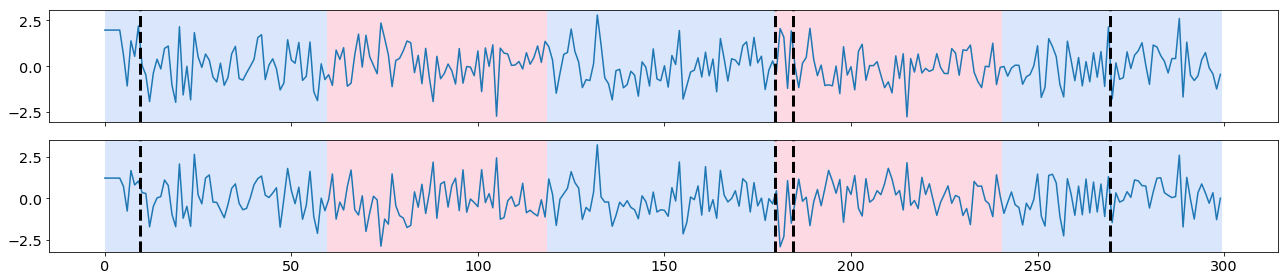

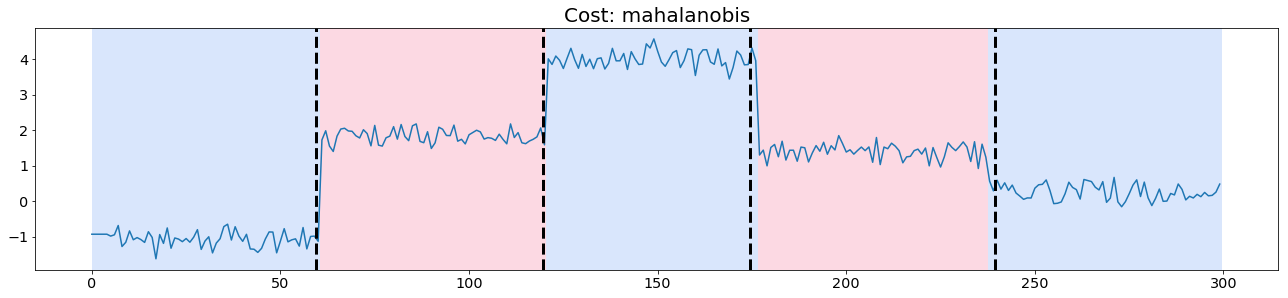

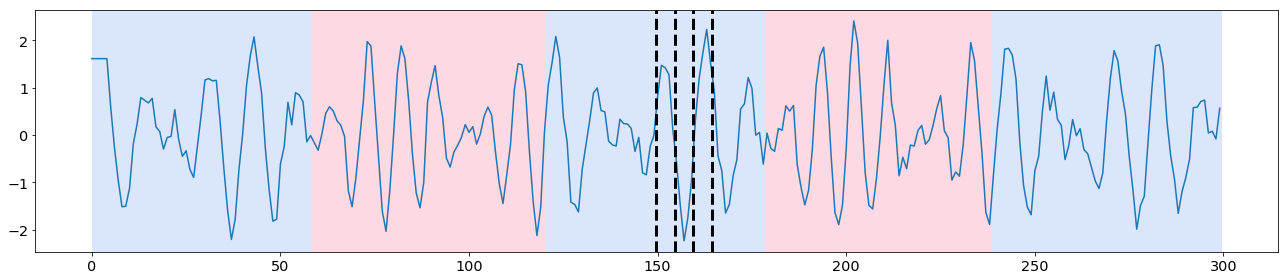

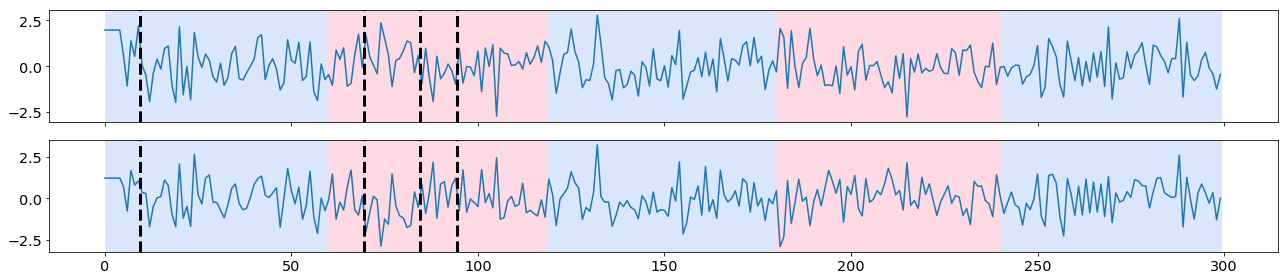

In [39]:
# cost functions = "l1", "l2", "normal", "rbf", "linear", "ar", "mahalanobis"
costs = ["l1", "l2", "normal", "rbf", "ar", "mahalanobis"]

for c in costs:
    # detection
    algo = rpt.Dynp(model=c, min_size=3, jump=5).fit(signal1)
    result1 = algo.predict(n_bkps=4)
    algo = rpt.Dynp(model=c, min_size=3, jump=5).fit(signal2)
    result2 = algo.predict(n_bkps=4)
    algo = rpt.Dynp(model=c, min_size=3, jump=5).fit(signal3)
    result3 = algo.predict(n_bkps=4)

    # display
    rpt.display(signal1, bkps1, result1, figsize=(18, 4))
    plt.title('Cost: ' + c, fontsize=20)
    plt.show()
    rpt.display(signal2, bkps2, result2, figsize=(18, 4))
    plt.show()
    rpt.display(signal3, bkps3, result3, figsize=(18, 4))
    plt.show()

### Binary segmentation

Binary change point detection is a sequential approach that is used to perform fast signal segmentation. It is a greedy procedure.

First one change point is detected in the complete input signal, then series is split around this change point. The operation is then repeated on the two resulting sub-signals. 

The complexity is ($O(n\log n)$, where n is the number of samples). It can extend any single change point detection method to detect multiple changes points and can work whether the number of regimes is known beforehand or not.

![Image](http://ctruong.perso.math.cnrs.fr/ruptures-docs/build/html/_images/schema_binseg.png)

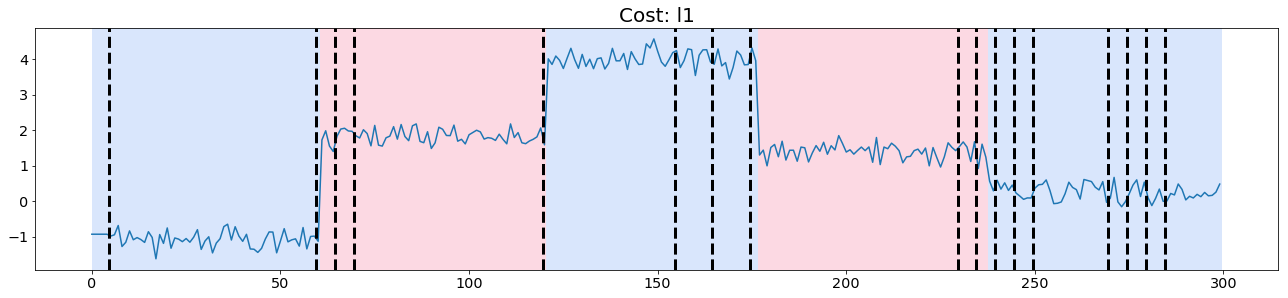

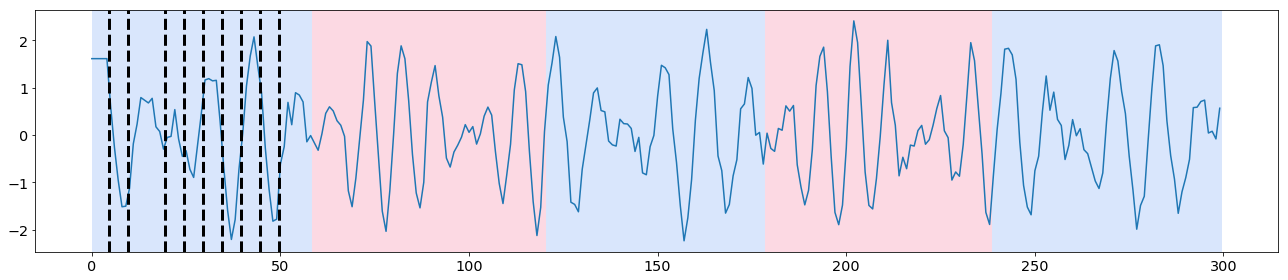

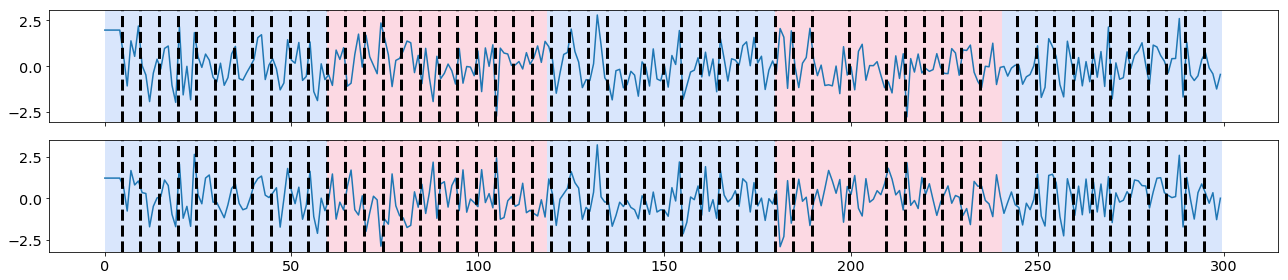

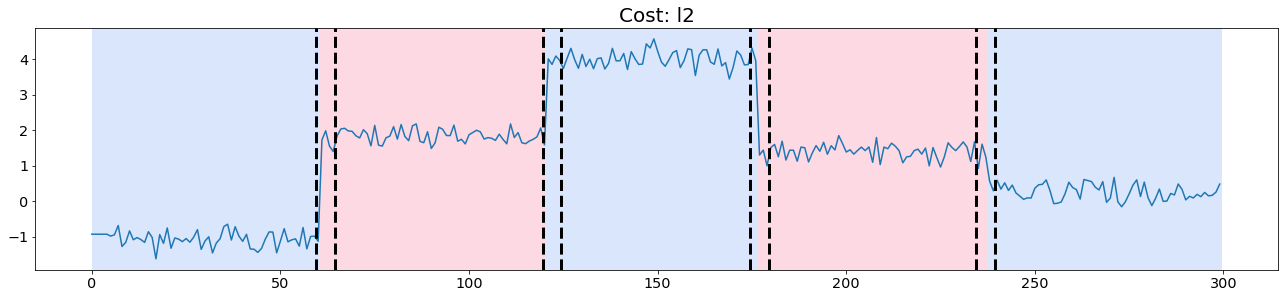

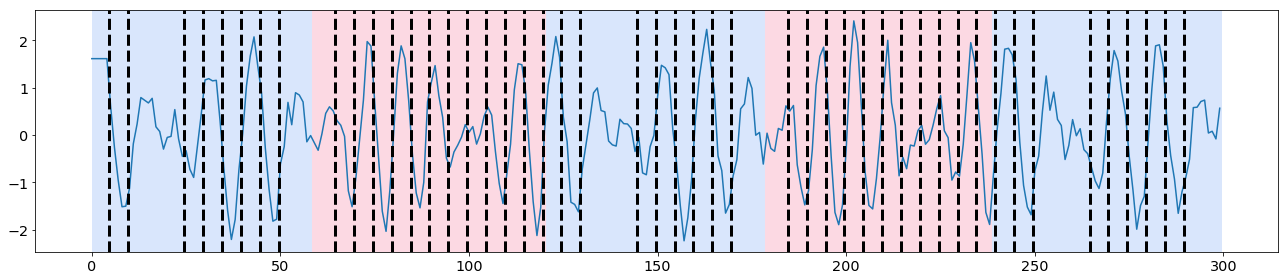

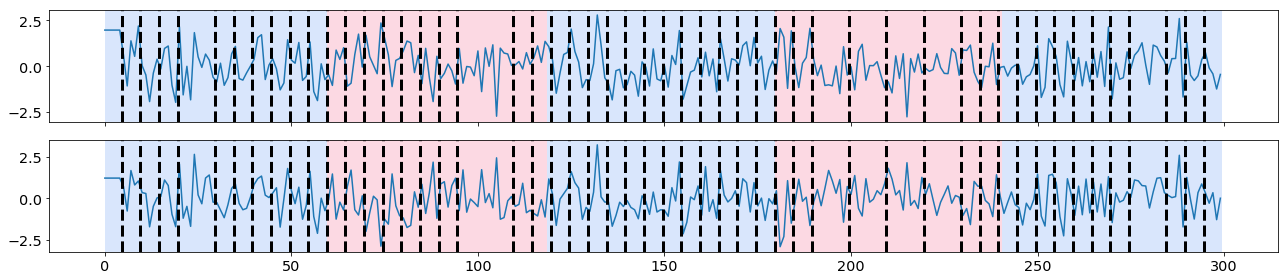

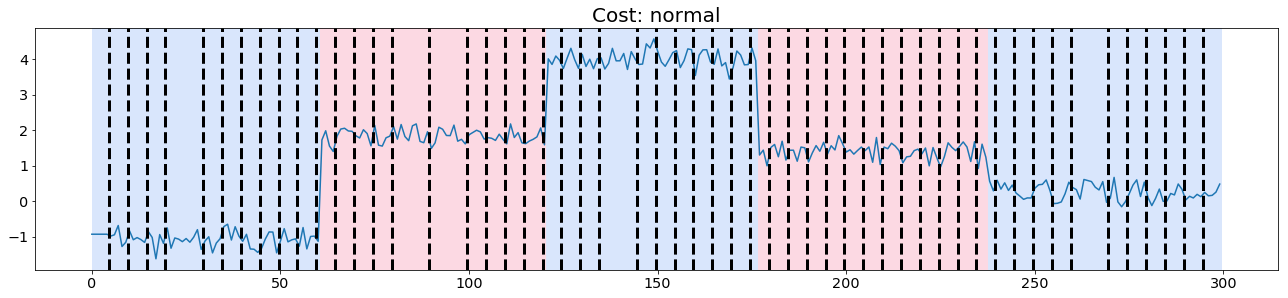

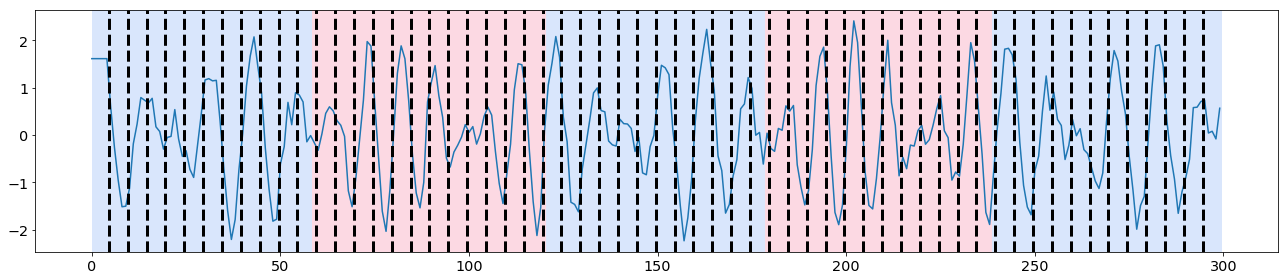

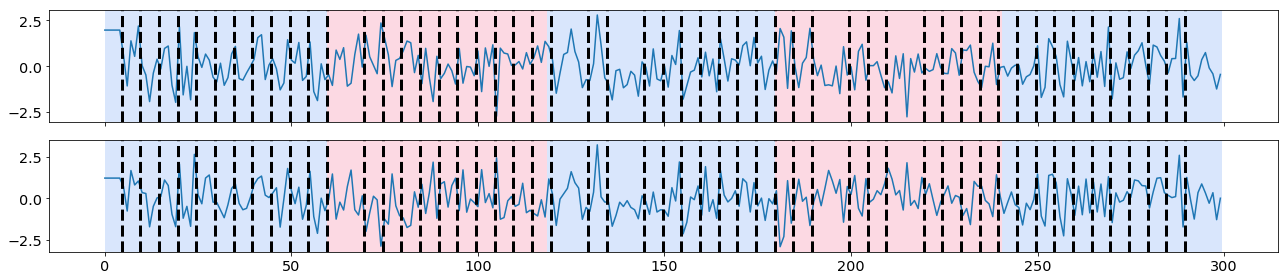

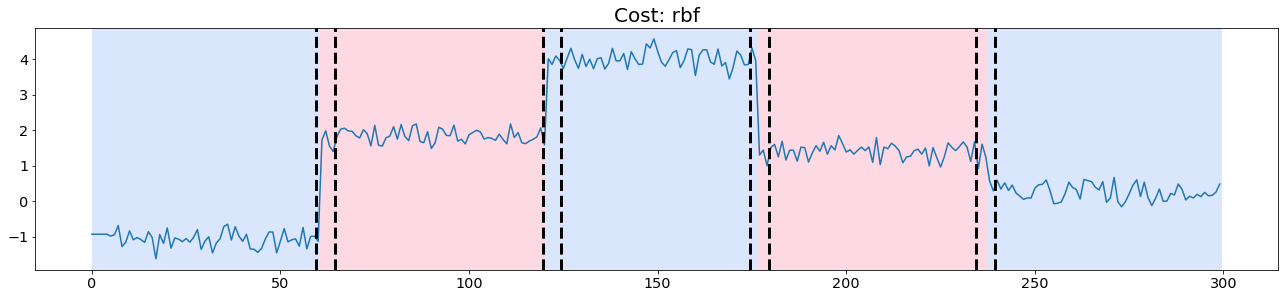

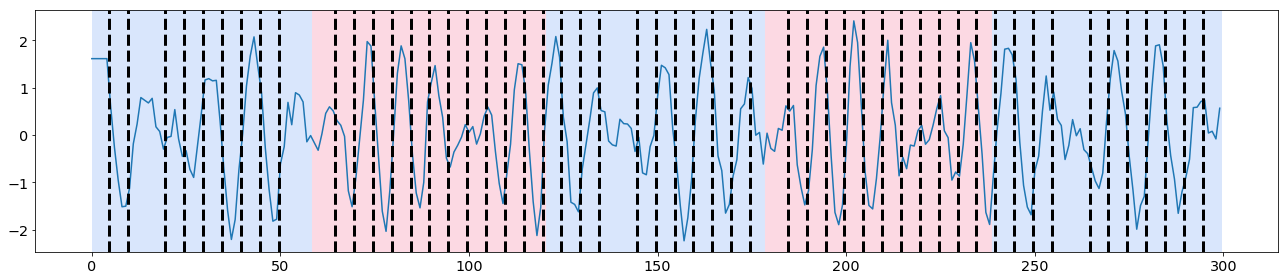

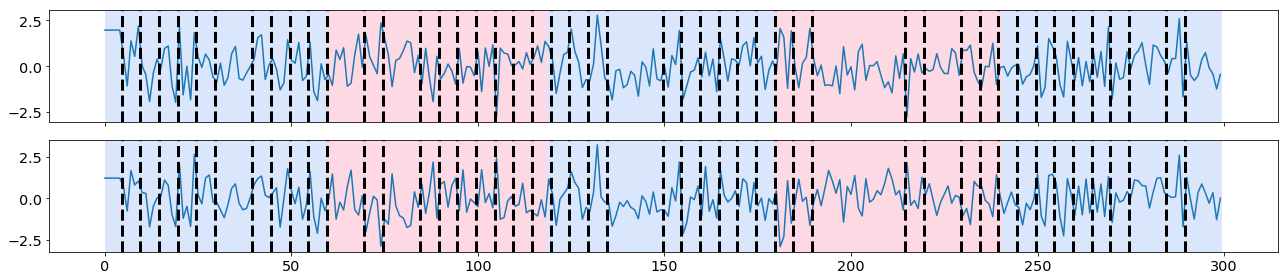

/anaconda3/lib/python3.6/site-packages/ruptures/costs/costautoregressive.py:169: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  _, residual, _, _ = lstsq(X, y)


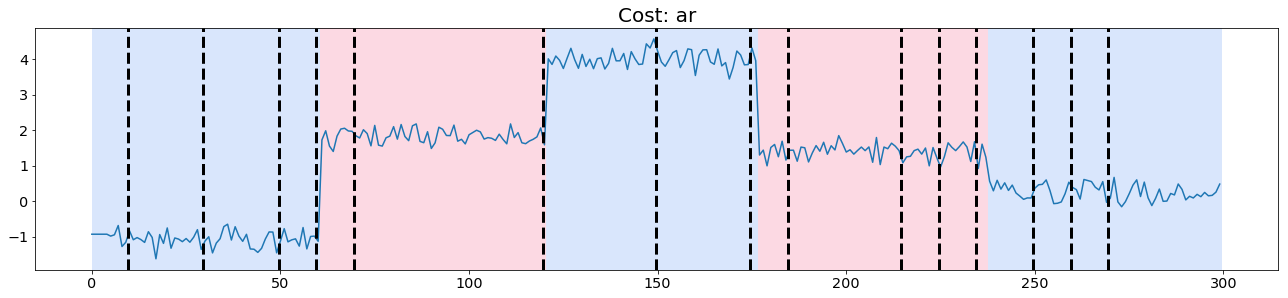

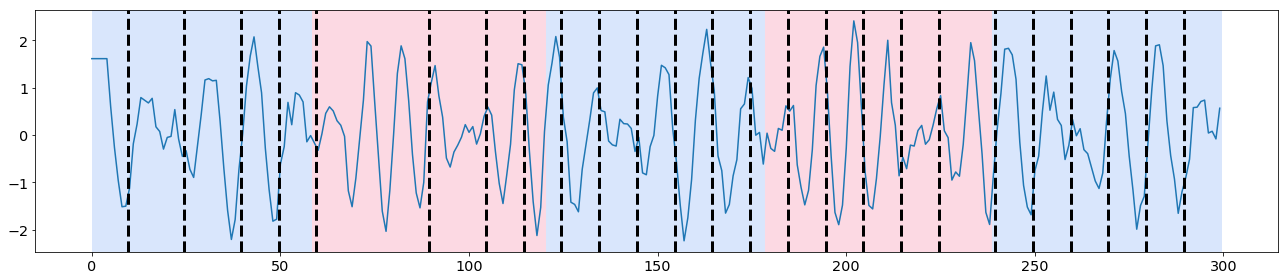

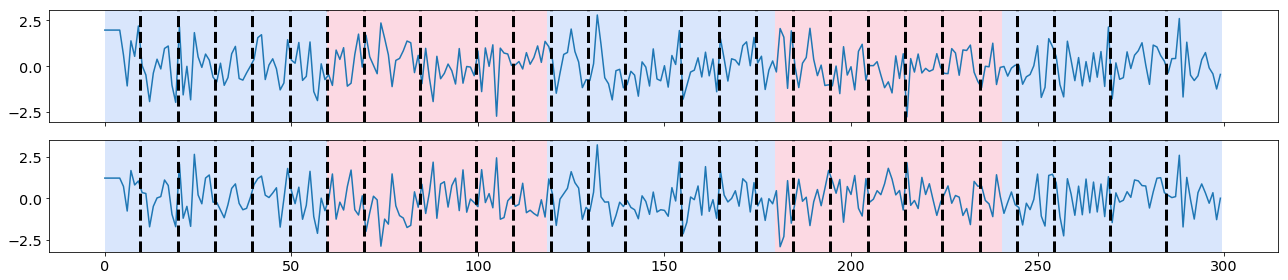

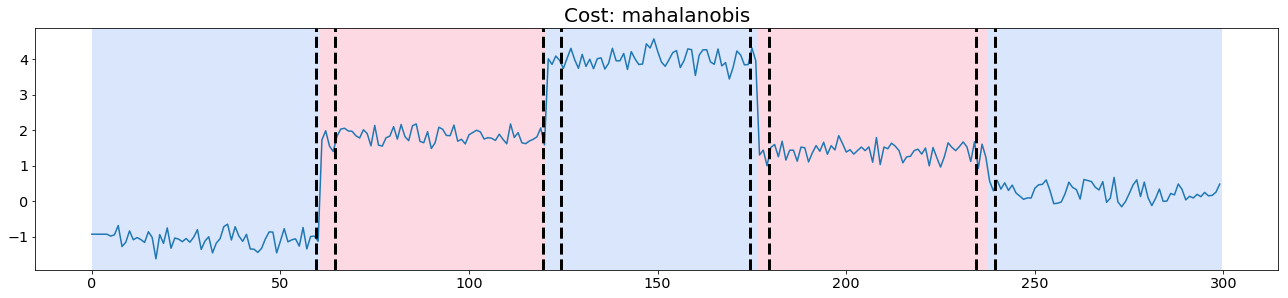

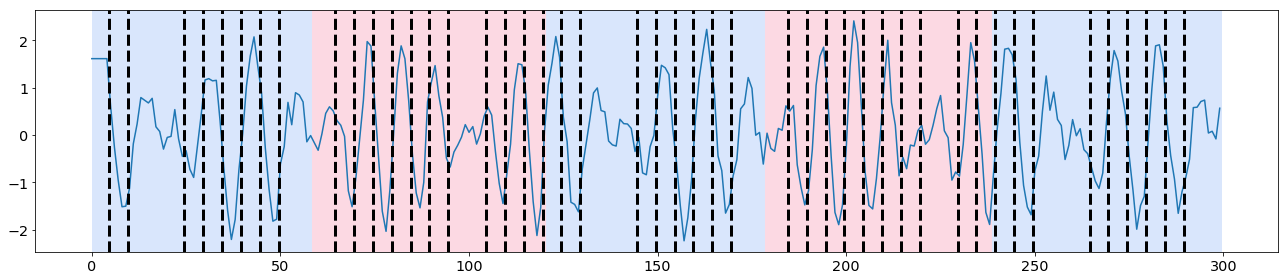

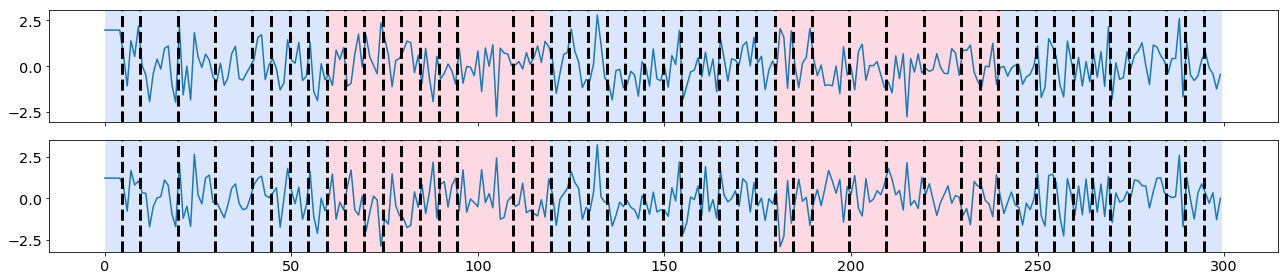

In [41]:
# cost functions = "l1", "l2", "normal", "rbf", "linear", "ar", "mahalanobis"
costs = ["l1", "l2", "normal", "rbf", "ar", "mahalanobis"]

for c in costs:
    # detection
    algo = rpt.Binseg(model=c).fit(signal1)
    result1 = algo.predict(pen=np.log(n)*dim*sigma**2)
    #result1 = algo.predict(epsilon=3*n_samples*sigma**2)
    algo = rpt.Binseg(model=c).fit(signal2)
    result2 = algo.predict(pen=np.log(n)*dim*sigma**2)
    #result2 = algo.predict(epsilon=3*n_samples*sigma**2)
    algo = rpt.Binseg(model=c).fit(signal3)
    result3 = algo.predict(pen=np.log(n)*dim*sigma**2)
    #result3 = algo.predict(epsilon=3*n_samples*sigma**2)

    # display
    rpt.display(signal1, bkps1, result1, figsize=(18, 4))
    plt.title('Cost: ' + c, fontsize=20)
    plt.show()
    rpt.display(signal2, bkps2, result2, figsize=(18, 4))
    plt.show()
    rpt.display(signal3, bkps3, result3, figsize=(18, 4))
    plt.show()

### Bottom-up segmentation

Bottom-up change point is also a sequential approach used to perform fast signal segmentation.

Unlike binary segmentation, bottom-up starts with many change points and successively deletes the less significant ones. First, the signal is divided in many sub-signals along a regular grid. Then contiguous segments are successively merged according to a measure of how similar they are. 

The complexity of bottom-up is $O(n\log n)$, where $n$ is the number of samples. It can extend any single change point detection method to detect multiple changes points and can work whether the number of regimes is known beforehand or not.

![Image](http://ctruong.perso.math.cnrs.fr/ruptures-docs/build/html/_images/schema_tree.png)

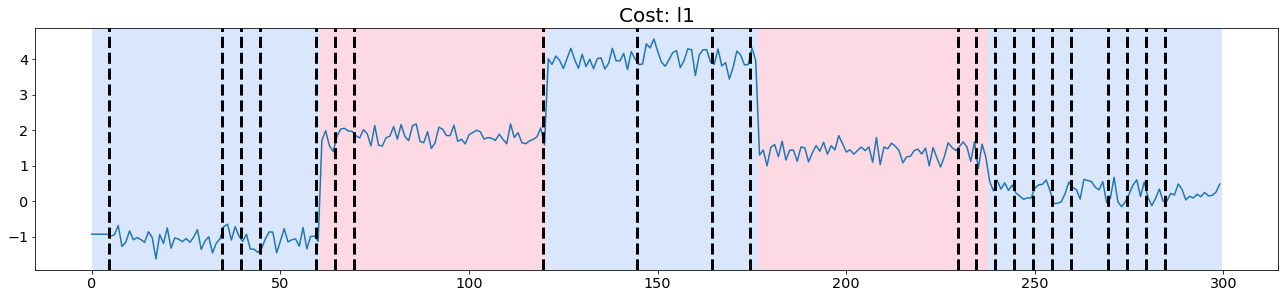

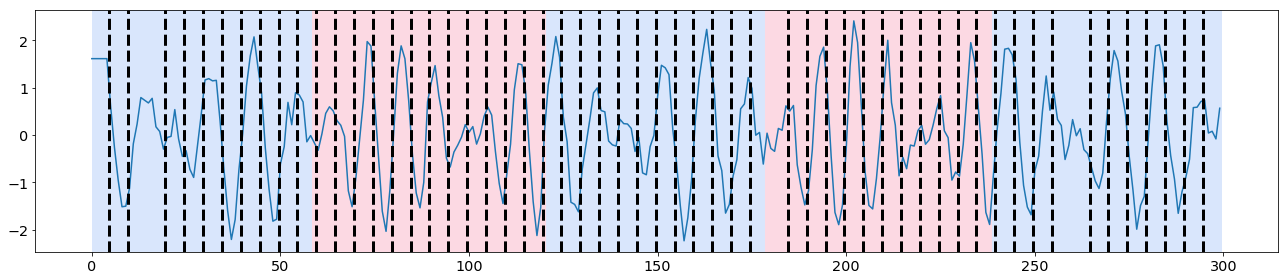

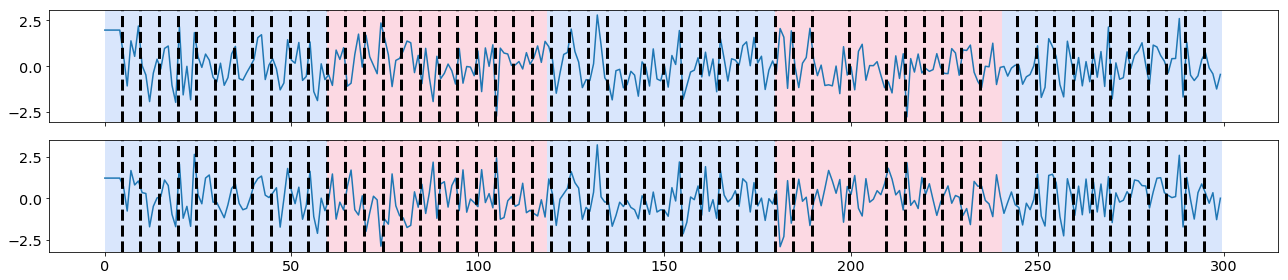

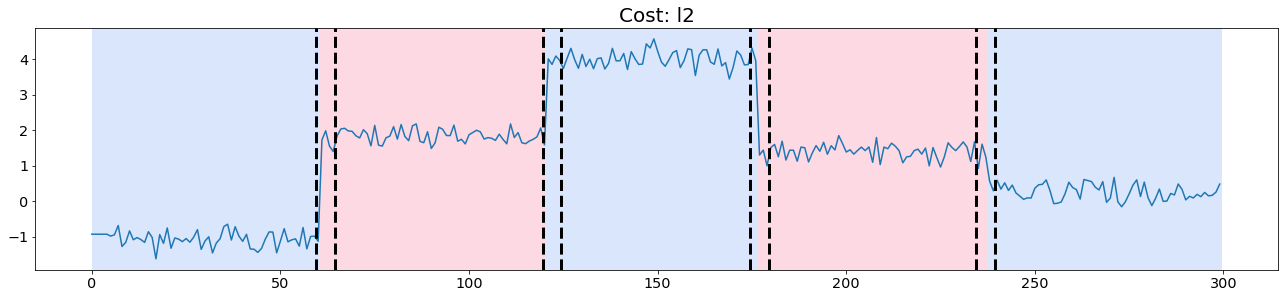

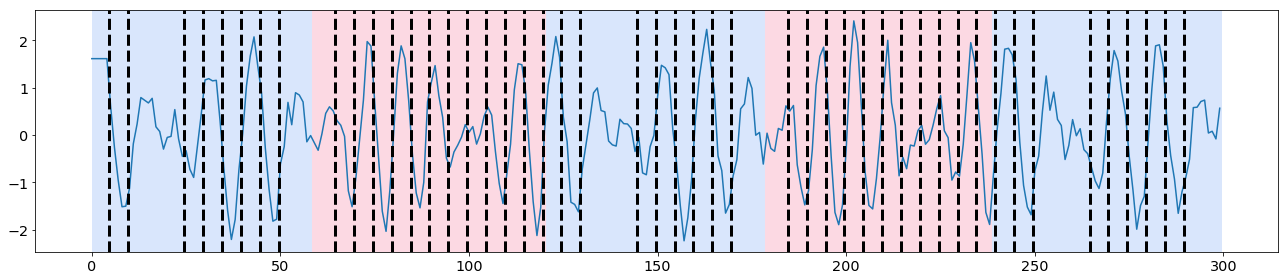

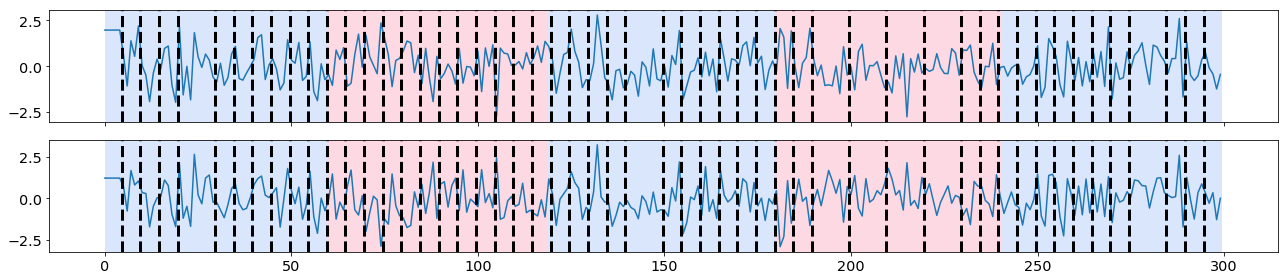

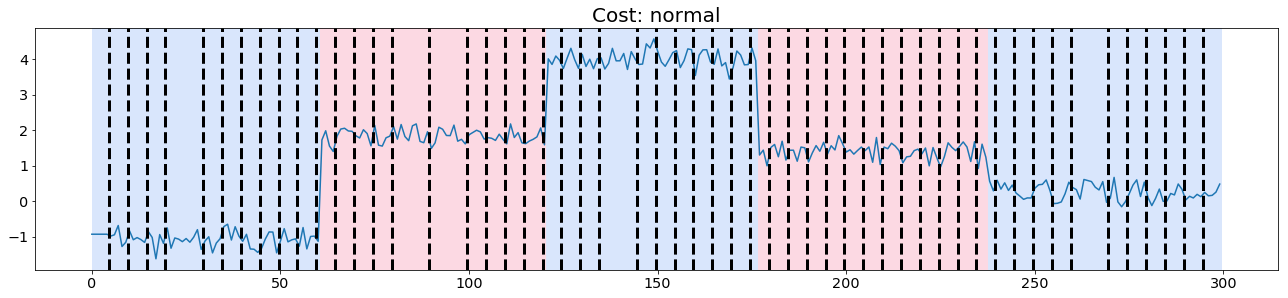

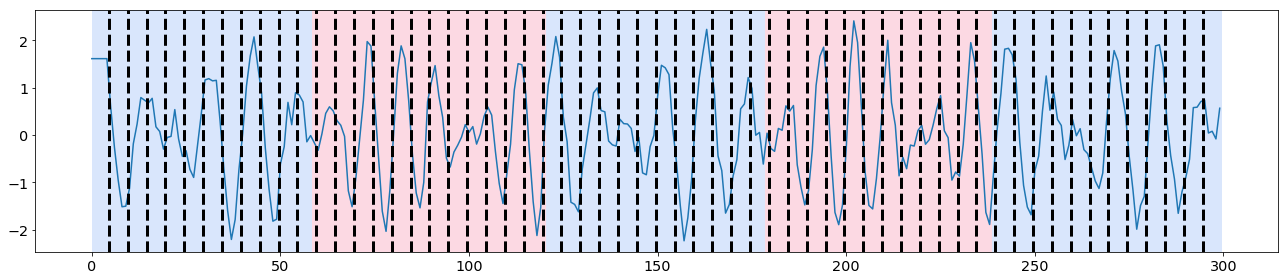

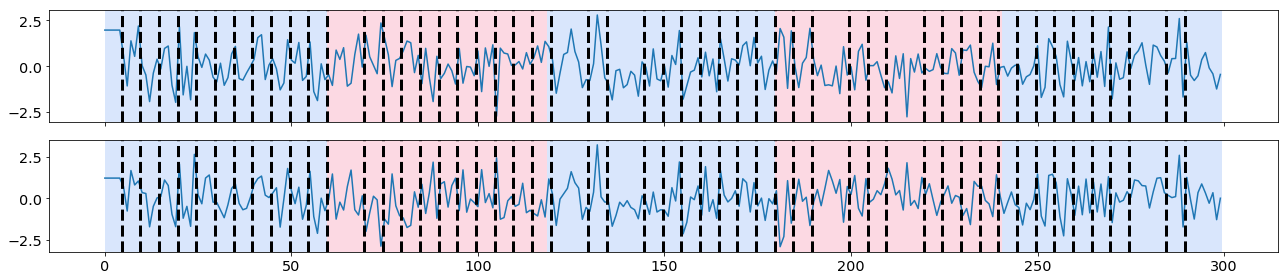

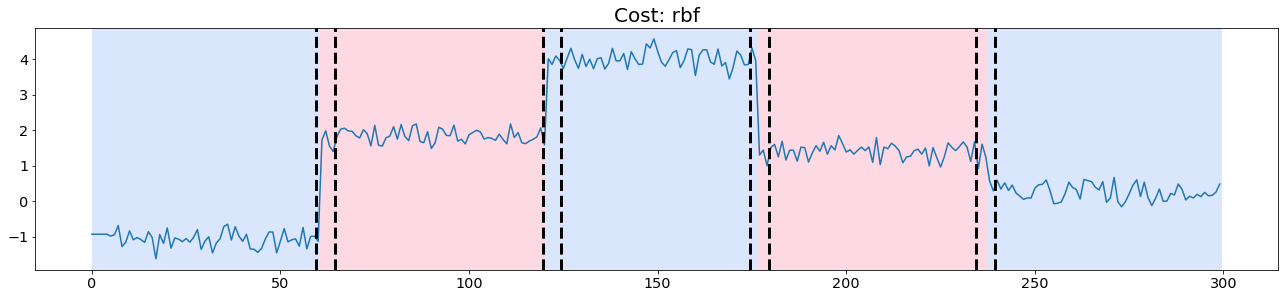

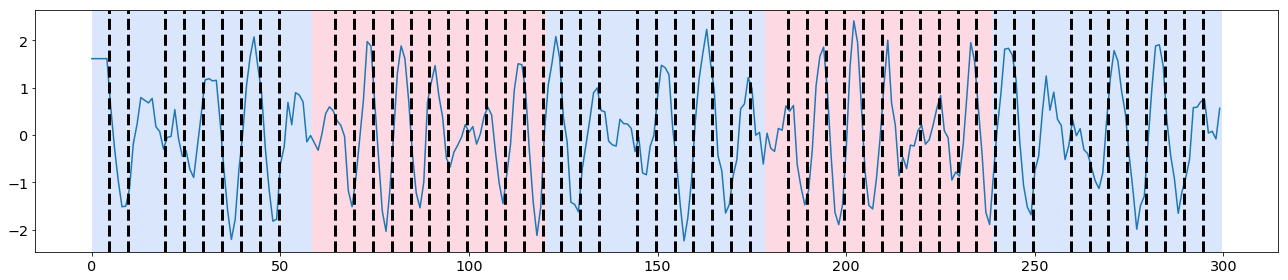

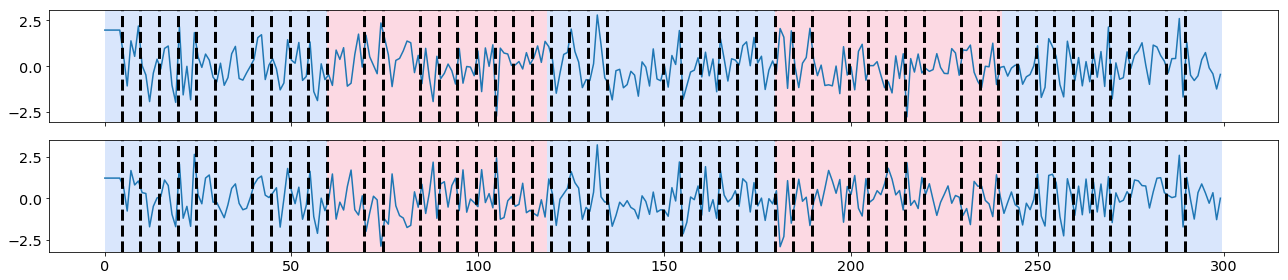

/anaconda3/lib/python3.6/site-packages/ruptures/costs/costautoregressive.py:169: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  _, residual, _, _ = lstsq(X, y)


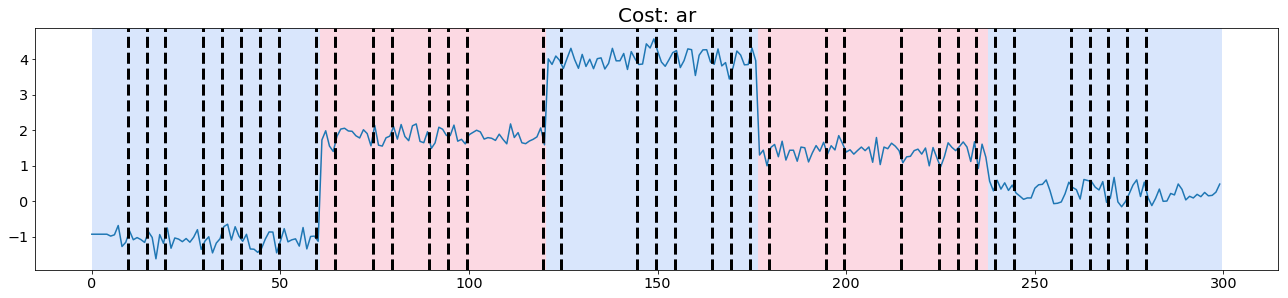

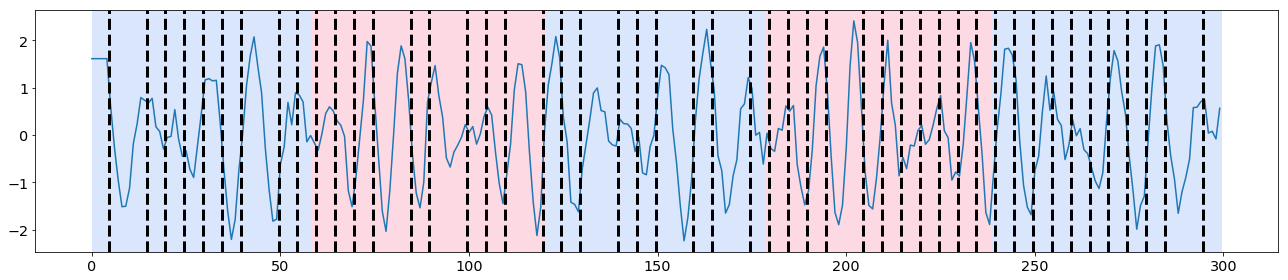

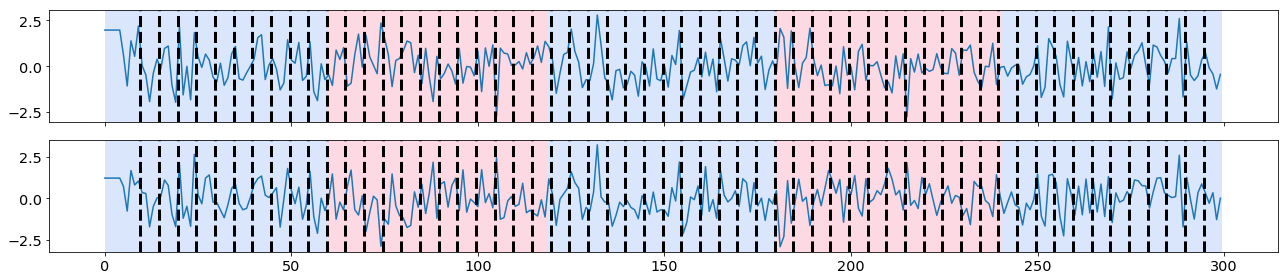

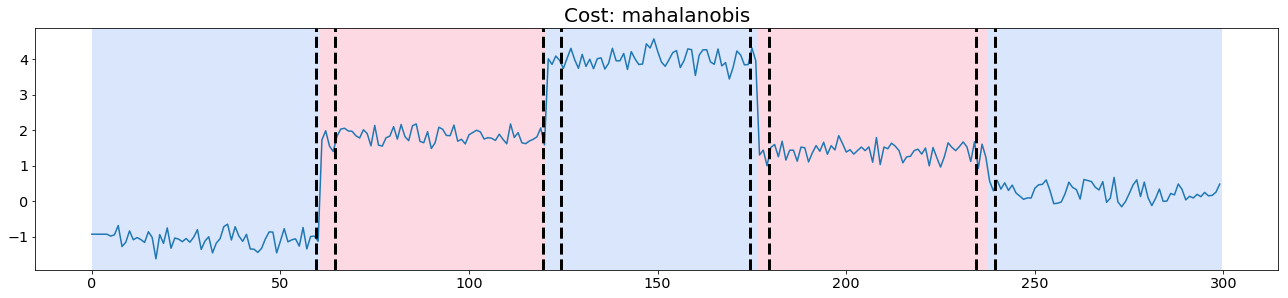

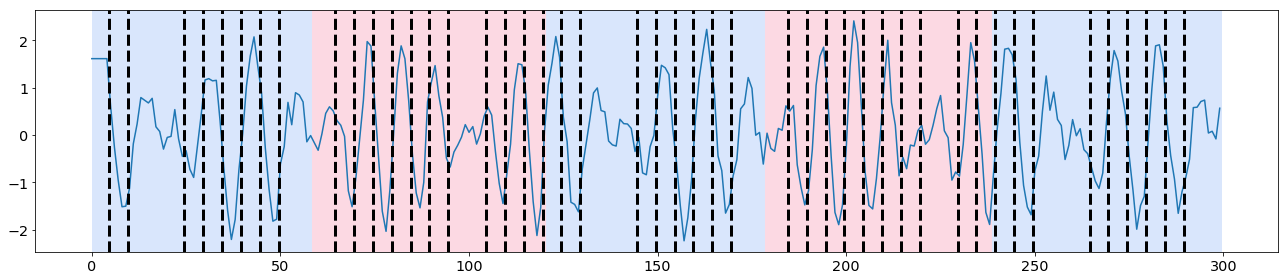

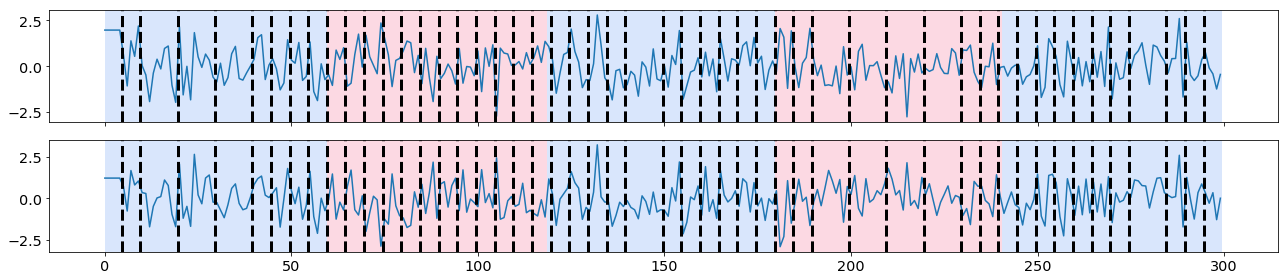

In [46]:
# cost functions = "l1", "l2", "normal", "rbf", "linear", "ar", "mahalanobis"
costs = ["l1", "l2", "normal", "rbf", "ar", "mahalanobis"]

for c in costs:
    # detection
    algo = rpt.BottomUp(model=c).fit(signal1)
    result1 = algo.predict(pen=np.log(n)*dim*sigma**2)
    algo = rpt.BottomUp(model=c).fit(signal2)
    result2 = algo.predict(pen=np.log(n)*dim*sigma**2)
    algo = rpt.BottomUp(model=c).fit(signal3)
    result3 = algo.predict(pen=np.log(n)*dim*sigma**2)

    # display
    rpt.display(signal1, bkps1, result1, figsize=(18, 4))
    plt.title('Cost: ' + c, fontsize=20)
    plt.show()
    rpt.display(signal2, bkps2, result2, figsize=(18, 4))
    plt.show()
    rpt.display(signal3, bkps3, result3, figsize=(18, 4))
    plt.show()

### Window-based change point detection 

The window-based algorithm uses two windows which slide along the data stream. The statistical properties of the signals within each window are compared with a discrepancy measure. 

The complexity is $O(nw)$, where $w$ is the window length and $n$ is the number of samples. It can extend any single change point detection method to detect multiple changes points and work whether the number of regimes is known beforehand or not.

![Image](http://ctruong.perso.math.cnrs.fr/ruptures-docs/build/html/_images/schema_fenetre.png)

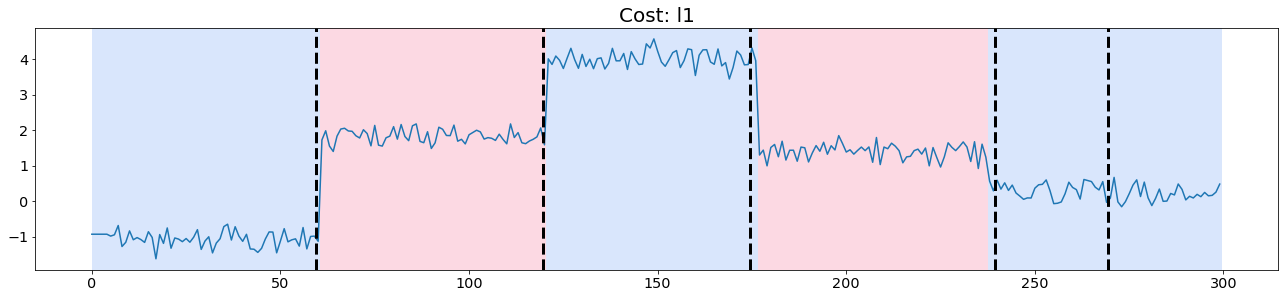

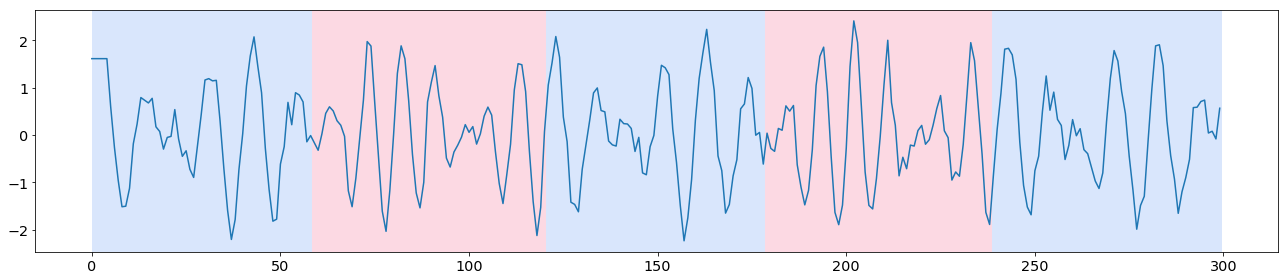

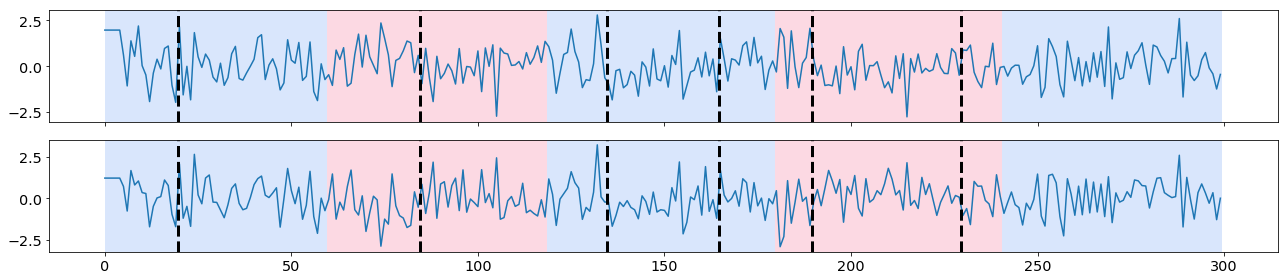

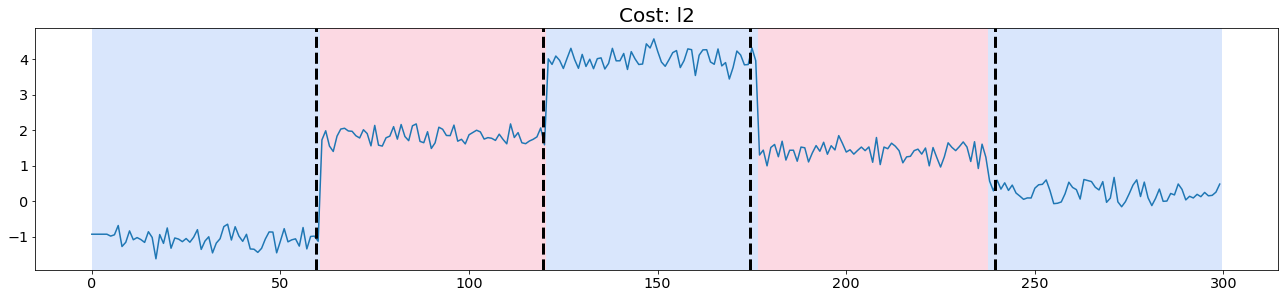

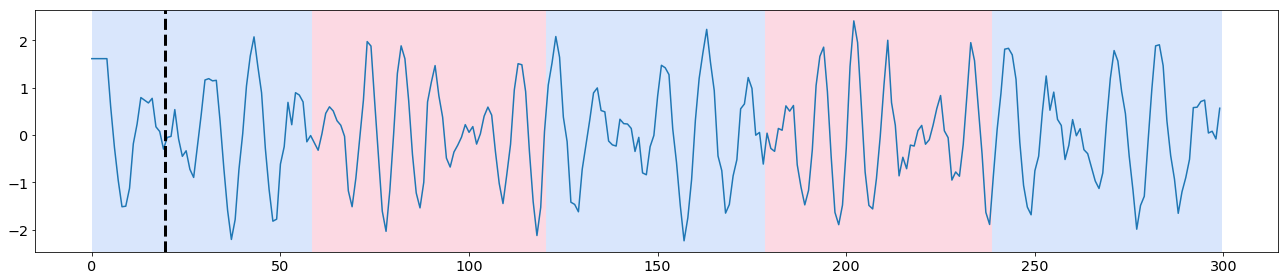

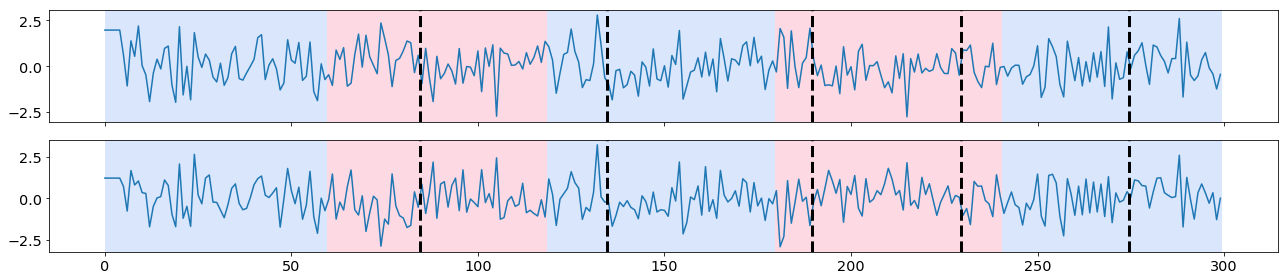

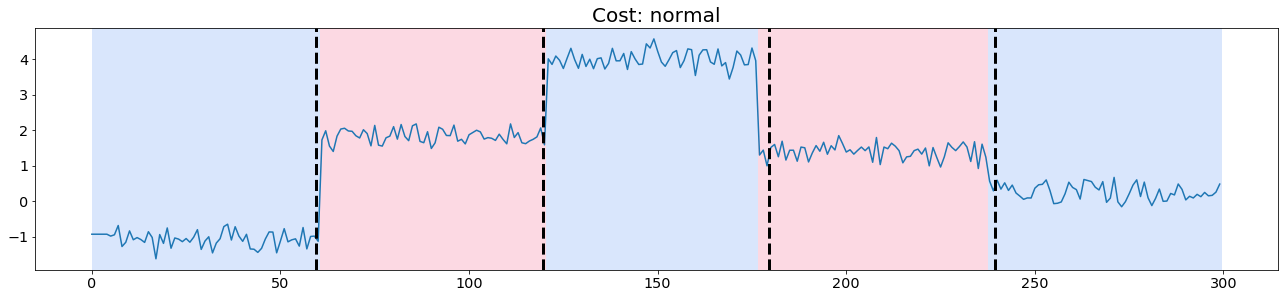

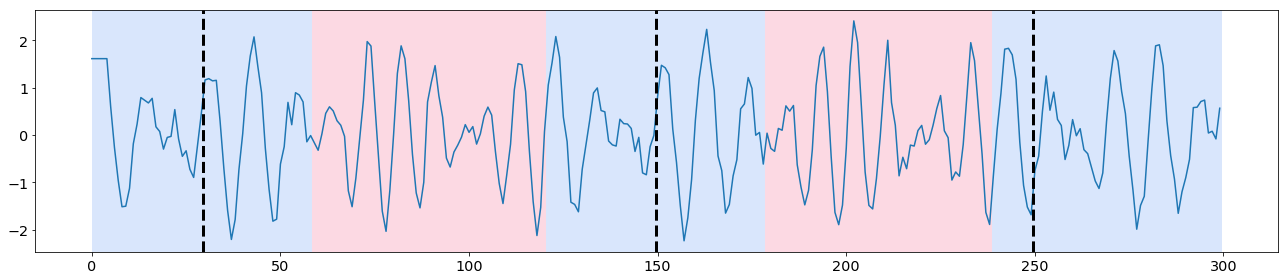

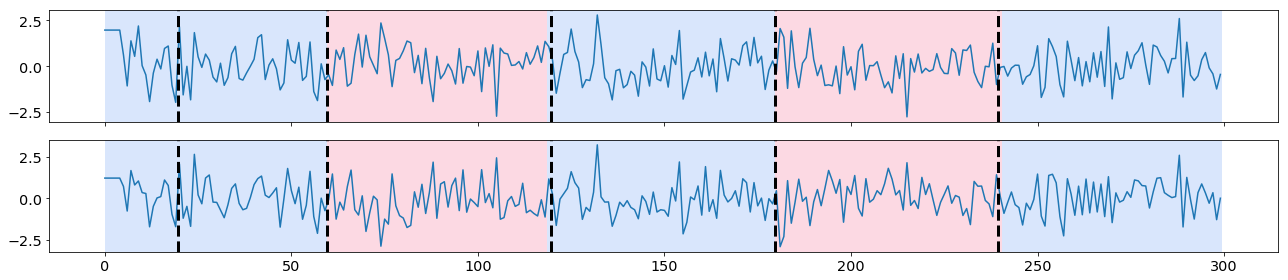

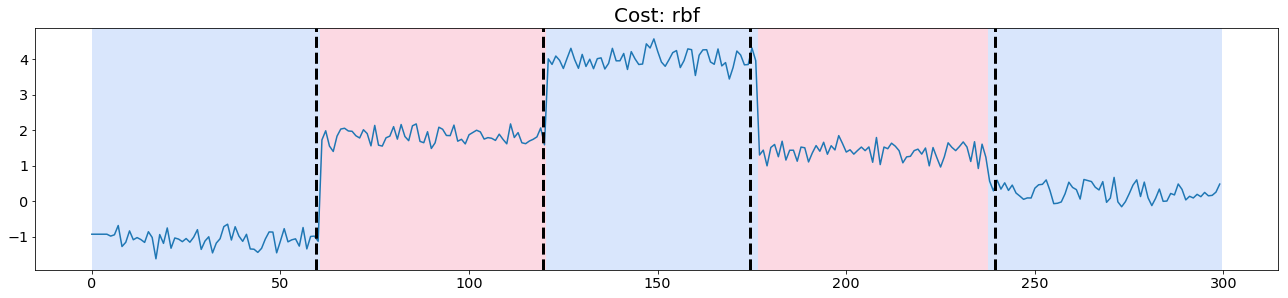

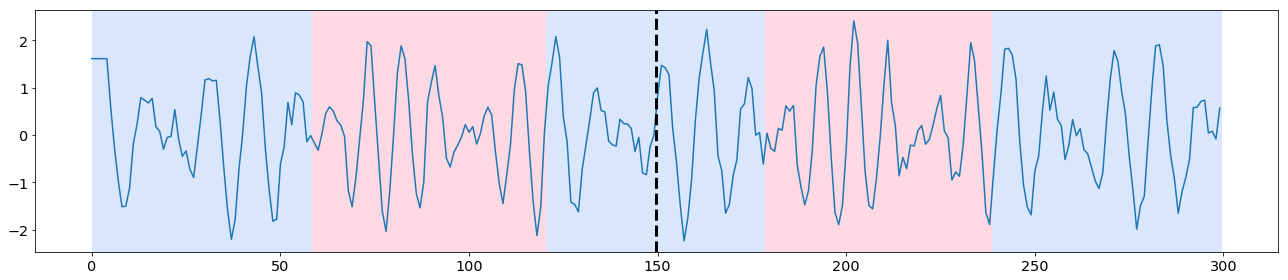

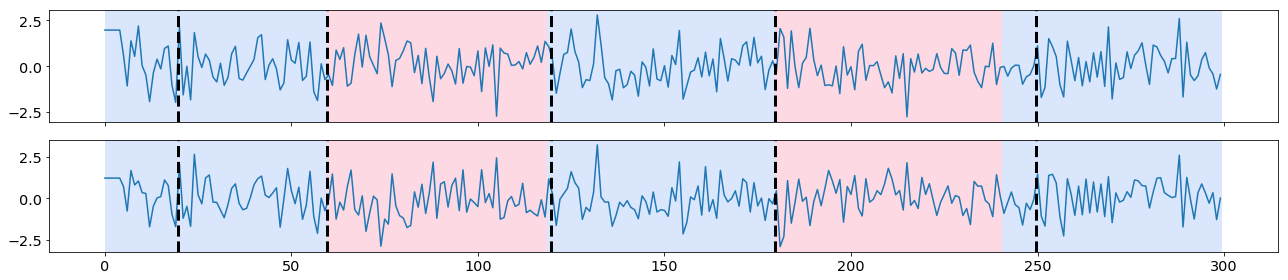

/anaconda3/lib/python3.6/site-packages/ruptures/costs/costautoregressive.py:169: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  _, residual, _, _ = lstsq(X, y)


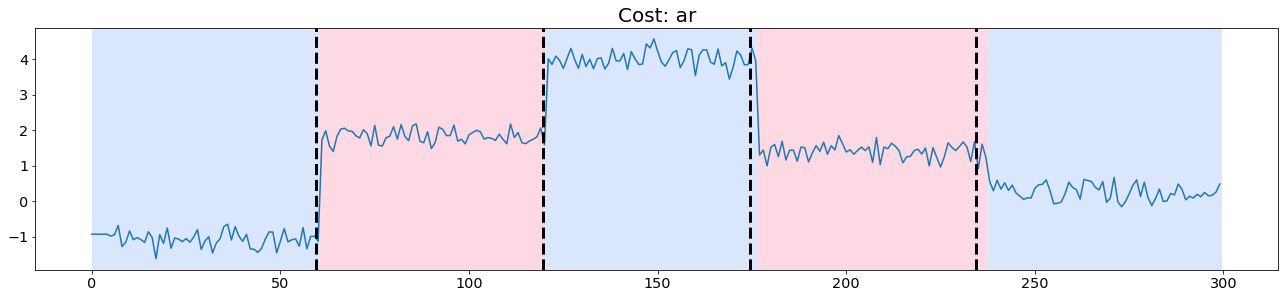

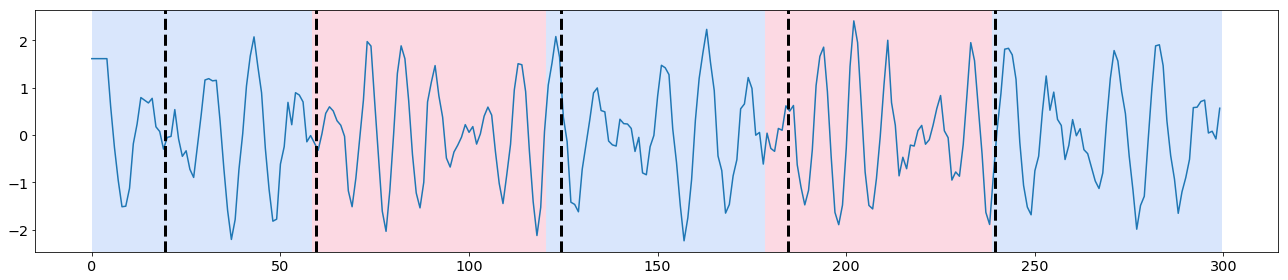

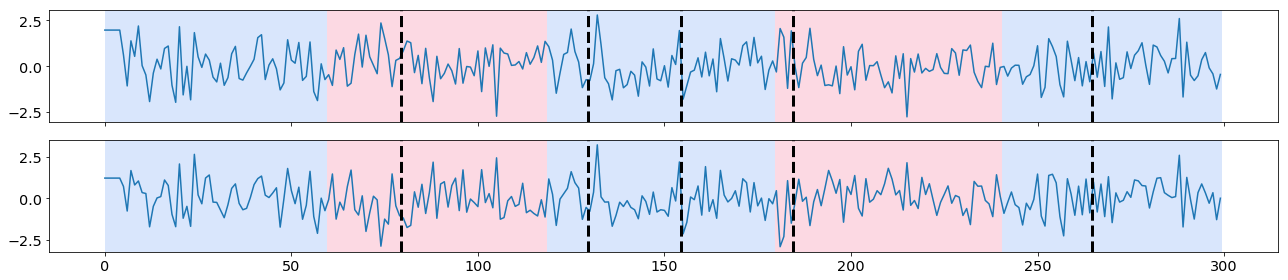

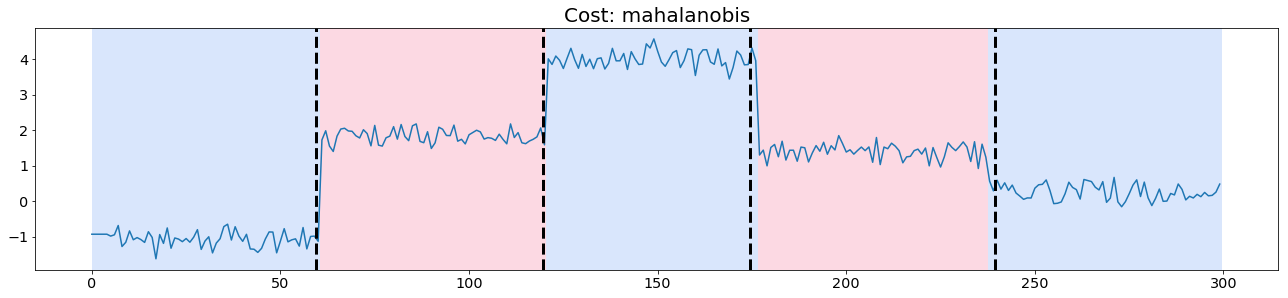

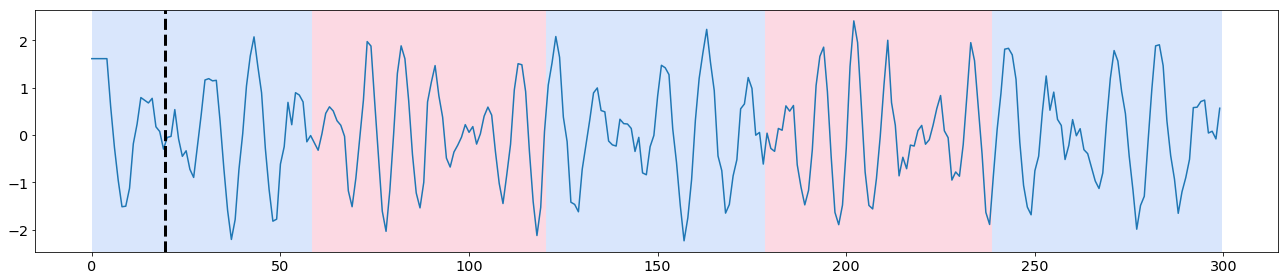

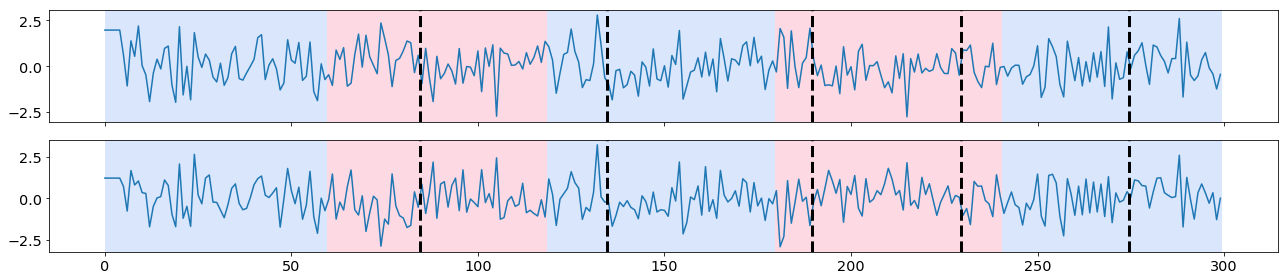

In [47]:
# cost functions = "l1", "l2", "normal", "rbf", "linear", "ar", "mahalanobis"
costs = ["l1", "l2", "normal", "rbf", "ar", "mahalanobis"]

for c in costs:
    # detection
    algo = rpt.Window(width=40, model=c).fit(signal1)
    result1 = algo.predict(pen=np.log(n)*dim*sigma**2)
    algo = rpt.Window(width=40, model=c).fit(signal2)
    result2 = algo.predict(pen=np.log(n)*dim*sigma**2)
    algo = rpt.Window(width=40, model=c).fit(signal3)
    result3 = algo.predict(pen=np.log(n)*dim*sigma**2)

    # display
    rpt.display(signal1, bkps1, result1, figsize=(18, 4))
    plt.title('Cost: ' + c, fontsize=20)
    plt.show()
    rpt.display(signal2, bkps2, result2, figsize=(18, 4))
    plt.show()
    rpt.display(signal3, bkps3, result3, figsize=(18, 4))
    plt.show()

# Evaluation

Now that we've explored all the various ways to detect change-points (some of with search-cost methods that proved to be better predictors for certain types of changes than others), we will conclude with various evaluation metrics that is also in the `ruptures` library.

## Hausdorff metric

The Hausdorff metric measures the worst prediction error. Assume a set of change point indexes $t_1,t_2,…$ and their estimates $\hat{t}_1,\hat{t}_2,…$. The Hausdorff metric is then equal to

$$\text{Hausdorff}({t_k}k,{\hat{t}_k}k):=\max{\max_k \min_l|t_k−\hat{t}_l|,\max_k\min_l|\hat{t}_k−t_l|}$$

![Image](http://ctruong.perso.math.cnrs.fr/ruptures-docs/build/html/_images/hausdorff.png)

In [51]:
print('Mean signal error: ', hausdorff(bkps1, result1))
print('Frequency signal error: ', hausdorff(bkps2, result2))
print('Correlation signal error: ', hausdorff(bkps3, result3))

Mean signal error:  2.0
Frequency signal error:  219.0
Correlation signal error:  34.0


## Rand index 

Another evaluation metric is through the Rand index, which measures the similarity between two segmentations. 

![Image](http://ctruong.perso.math.cnrs.fr/ruptures-docs/build/html/_images/randindex.png)

In [53]:
print('Mean signal RI: ', randindex(bkps1, result1))
print('Frequency signal RI: ', randindex(bkps2, result2))
print('Correlation signal RI: ', randindex(bkps3, result3))

Mean signal RI:  0.9842666666666666
Frequency signal RI:  0.28988888888888886
Correlation signal RI:  0.8613777777777778


## Precision-recall

In precision and recall, a true changepoint is declared “detected” (or positive) if there is at least one computed changepoint at less than “margin” points from it. 

![Image](http://ctruong.perso.math.cnrs.fr/ruptures-docs/build/html/_images/precision_recall.png)

In [55]:
print('Mean signal P-R: ', precision_recall(bkps1, result1))
print('Frequency signal P-R: ', precision_recall(bkps2, result2))
print('Correlation signal P-R: ', precision_recall(bkps3, result3))

Mean signal P-R:  (1.0, 1.0)
Frequency signal P-R:  (0.0, 0.0)
Correlation signal P-R:  (0.0, 0.0)
